# PART-1 (Project based)

# DOMAIN: Automobile

• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5
continuous attributes
--Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg

# 1.  Import and warehouse data

# Import all the given datasets and explore shape and size

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
auto_df = pd.read_json('Part1 - Car-Attributes.json')
auto_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
# Exploring the shape of the dataset
auto_df.shape
print(f'''Automobile dataset has {auto_df.shape[0]} rows and {auto_df.shape[1]} attributes.''')

Automobile dataset has 398 rows and 8 attributes.


In [4]:
# getting info about data types of each attributes.
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


# Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use

In [5]:
auto_df.to_csv('autompg_file.csv')

# Import the data from above steps into python.

In [6]:
df = pd.read_csv('autompg_file.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0,18.0,8,307.0,130,3504,12.0,70,1
1,1,15.0,8,350.0,165,3693,11.5,70,1
2,2,18.0,8,318.0,150,3436,11.0,70,1
3,3,16.0,8,304.0,150,3433,12.0,70,1
4,4,17.0,8,302.0,140,3449,10.5,70,1


# 2. Data cleansing

# Missing/incorrect value treatment

In [7]:
auto_df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

No missing values found un the dataset.

In [8]:
#checking for '?' values.
for value in auto_df.columns:
    print(value,':',sum(auto_df[value]=='?'))

mpg : 0
cyl : 0
disp : 0
hp : 6
wt : 0
acc : 0
yr : 0
origin : 0


In [9]:
# replacing '?' with null values
auto_df['hp'].replace('?',np.nan,inplace=True)

In [10]:
#cross checking whether '?' is replaced with null values.
for value in auto_df.columns:
    print(value,':',sum(auto_df[value]=='?'))

mpg : 0
cyl : 0
disp : 0
hp : 0
wt : 0
acc : 0
yr : 0
origin : 0


In [11]:
# still there are missing entries
auto_df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        6
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [12]:
# replacing null value with mean vlaue
auto_df['hp'].replace(np.nan,auto_df['hp'].mean(),inplace=True)
auto_df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [13]:
auto_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


# Drop attribute/s if required using relevant functional knowledge

In [14]:
auto_df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
wt,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


In [15]:
auto_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [16]:
auto_df['yr'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [17]:
auto_df['yr'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: yr, dtype: int64

# 3. Data analysis & visualisation

# Perform detailed statistical analysis on the data.

In [18]:
auto_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


'mpg' is almost normally distributed 
'cyl' found no outlier with smooth distribution
'disp' might be slightly skewed, chances of presence of outlier
'acc' is normally distributed with no outlier
'yr' is also normally distributed

# Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

# Univariate analysis

The number of outliers in mpg: 1


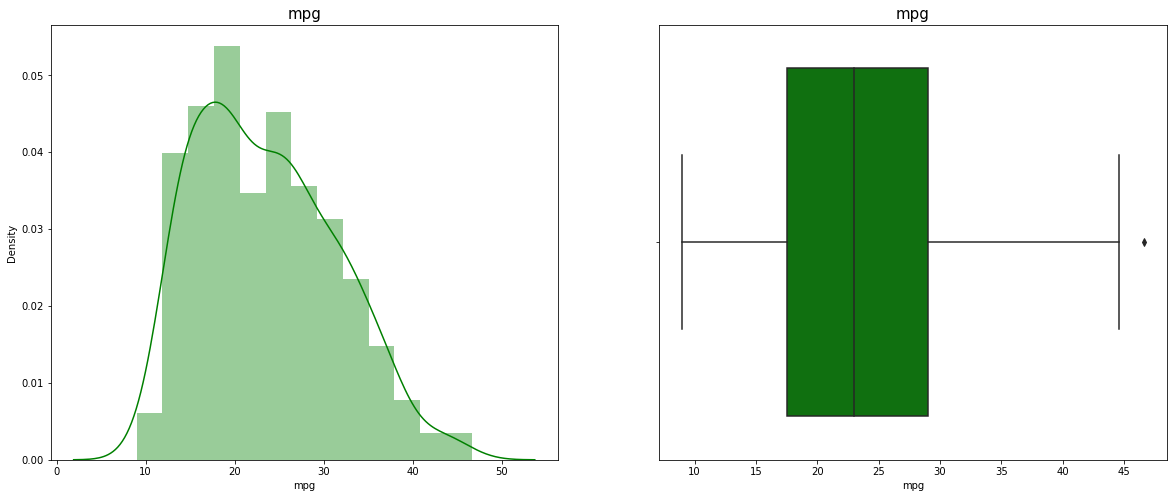

In [19]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('mpg',fontsize=15)
sns.distplot(auto_df['mpg'],color='green')

plt.subplot(1,2,2)
plt.title('mpg',fontsize=15)
sns.boxplot(auto_df['mpg'],color='green');

q25 = np.percentile(auto_df['mpg'],25)
q75 = np.percentile(auto_df['mpg'],75)
IQR = q75-q25
whiskers = 1.5*IQR
low_wh = q25-whiskers
hig_wh = q75+whiskers
outliers = [i for i in auto_df['mpg'] if i<low_wh or i>hig_wh]
print(f'''The number of outliers in mpg: {len(outliers)}''')

There is one outliers lying above whiskers for 'mpg'

The number of outliers in cyl: 0


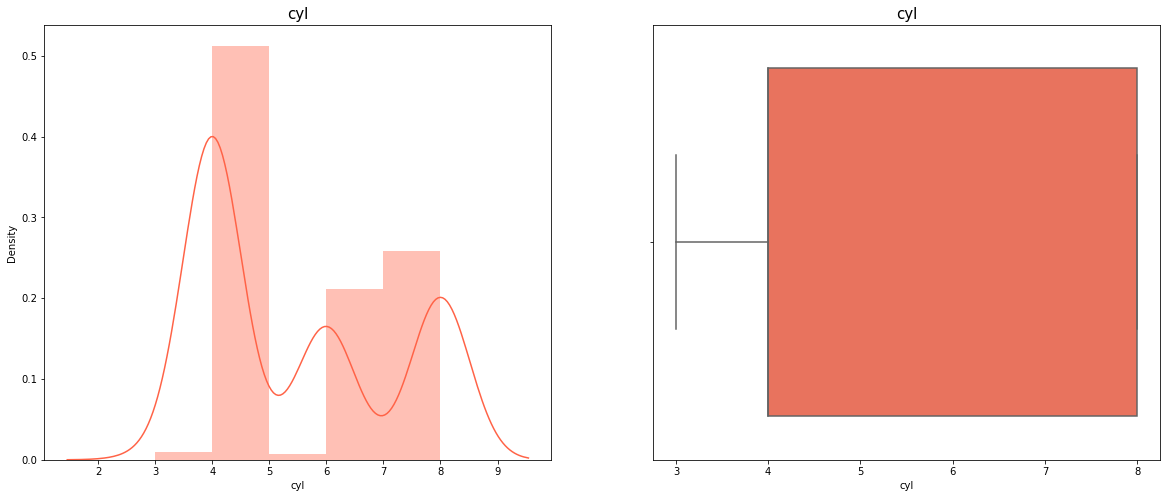

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('cyl',fontsize=15)
sns.distplot(auto_df['cyl'],color='tomato')

plt.subplot(1,2,2)
plt.title('cyl',fontsize=15)
sns.boxplot(auto_df['cyl'],color='tomato');

q25 = np.percentile(auto_df['cyl'],25)
q75 = np.percentile(auto_df['cyl'],75)
IQR = q75-q25
whiskers = 1.5*IQR
low_wh = q25-whiskers
hig_wh = q75+whiskers
outliers = [i for i in auto_df['cyl'] if i<low_wh or i>hig_wh]
print(f'''The number of outliers in cyl: {len(outliers)}''')

data distribution is not normal. No outlier can be seen. 

The number of outliers in disp: 0


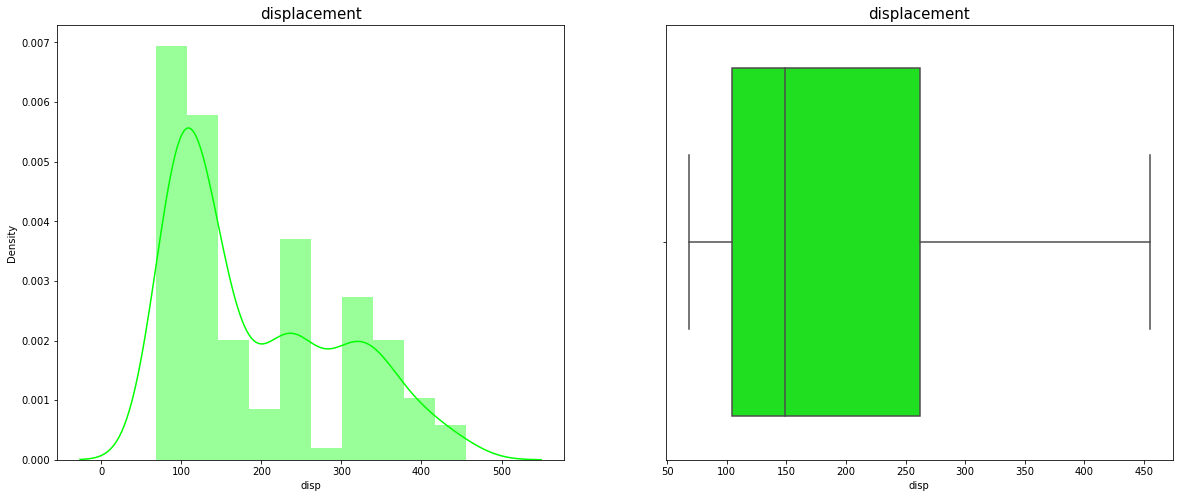

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('displacement',fontsize=15)
sns.distplot(auto_df['disp'],color='lime')

plt.subplot(1,2,2)
plt.title('displacement',fontsize=15)
sns.boxplot(auto_df['disp'],color='lime');

q25 = np.percentile(auto_df['disp'],25)
q75 = np.percentile(auto_df['disp'],75)
IQR = q75-q25
whiskers = 1.5*IQR
low_wh = q25-whiskers
hig_wh = q75+whiskers
outliers = [i for i in auto_df['disp'] if i<low_wh or i>hig_wh]
print(f'''The number of outliers in disp: {len(outliers)}''')

data distribution is not normal. No outlier can be seen. 

The number of outliers in hp: 11


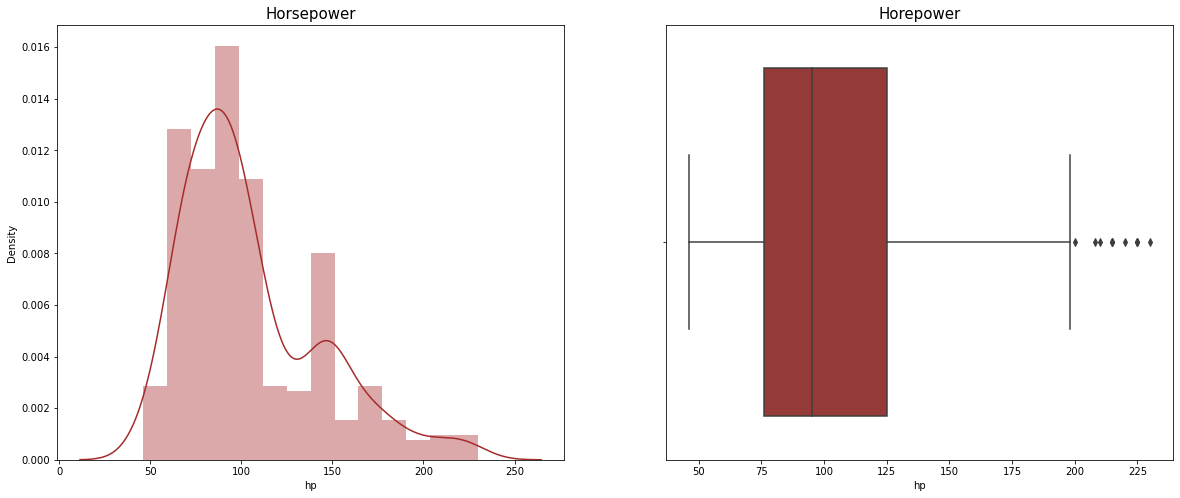

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Horsepower',fontsize=15)
sns.distplot(auto_df['hp'],color='brown')

plt.subplot(1,2,2)
plt.title('Horepower',fontsize=15)
sns.boxplot(auto_df['hp'],color='brown');

q25 = np.percentile(auto_df['hp'],25)
q75 = np.percentile(auto_df['hp'],75)
IQR = q75-q25
whiskers = 1.5*IQR
low_wh = q25-whiskers
hig_wh = q75+whiskers
outliers = [i for i in auto_df['hp'] if i<low_wh or i>hig_wh]
print(f'''The number of outliers in hp: {len(outliers)}''')

Distribution is not normal and there are 11 outliers can be seen above upper whisker.

The number of outliers in wt: 0


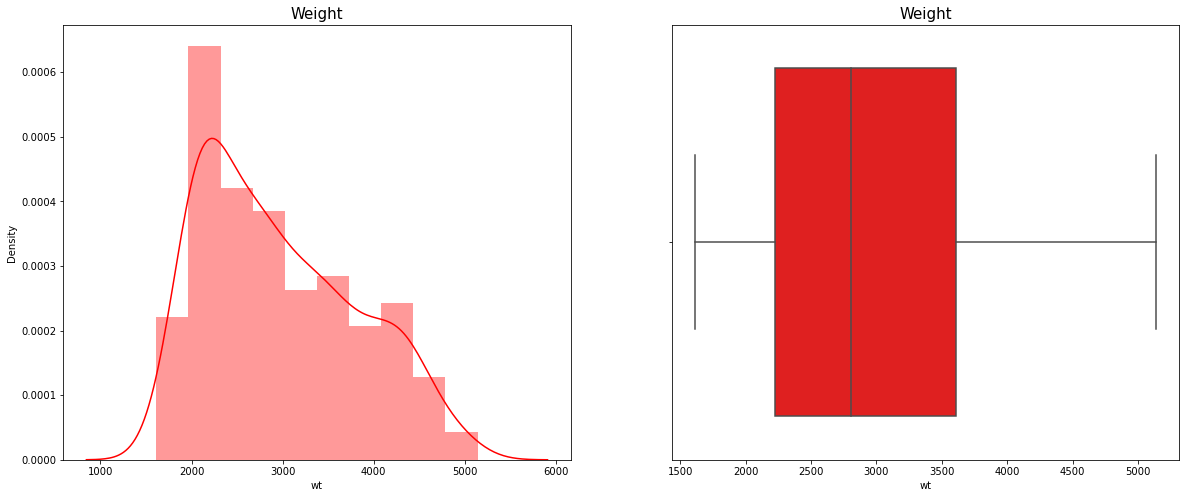

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Weight',fontsize=15)
sns.distplot(auto_df['wt'],color='red')

plt.subplot(1,2,2)
plt.title('Weight',fontsize=15)
sns.boxplot(auto_df['wt'],color='red');

q25 = np.percentile(auto_df['wt'],25)
q75 = np.percentile(auto_df['wt'],75)
IQR = q75-q25
whiskers = 1.5*IQR
low_wh = q25-whiskers
hig_wh = q75+whiskers
outliers = [i for i in auto_df['wt'] if i<low_wh or i>hig_wh]
print(f'''The number of outliers in wt: {len(outliers)}''')

There are no outliers distribution is skewed towards right

The number of outliers in acc: 9


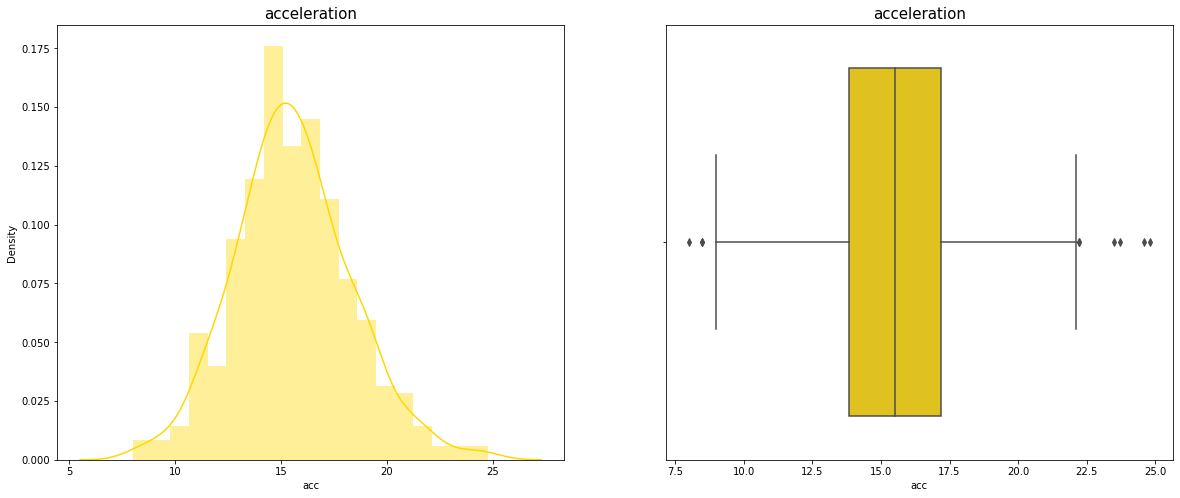

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('acceleration',fontsize=15)
sns.distplot(auto_df['acc'],color='gold')

plt.subplot(1,2,2)
plt.title('acceleration',fontsize=15)
sns.boxplot(auto_df['acc'],color='gold');

q25 = np.percentile(auto_df['acc'],25)
q75 = np.percentile(auto_df['acc'],75)
IQR = q75-q25
whiskers = 1.5*IQR
low_wh = q25-whiskers
hig_wh = q75+whiskers
outliers = [i for i in auto_df['acc'] if i<low_wh or i>hig_wh]
print(f'''The number of outliers in acc: {len(outliers)}''')

Data is normally distributed with 9 outliers on both sides of the whiskers

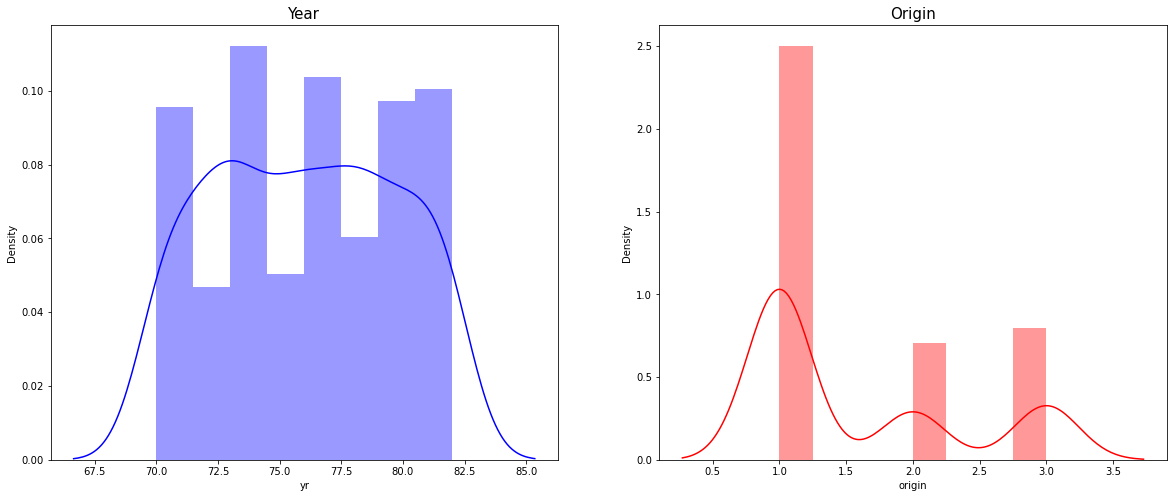

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Year',fontsize=15)
sns.distplot(auto_df['yr'],color='blue')

plt.subplot(1,2,2)
plt.title('Origin',fontsize=15)
sns.distplot(auto_df['origin'],color='red');

Since, 'mpg','hp' and 'acc' have outliers. Let us take logaritmic transform for hp,mpg and acc to remove outliers.

In [26]:
auto_df['mpg'] = np.log(auto_df['mpg'])
auto_df['hp'] = np.log(auto_df['hp'])
auto_df['acc'] = np.log(auto_df['acc'])
auto_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,2.890372,8,307.0,4.867534,3504,2.484907,70,1
1,2.708050,8,350.0,5.105945,3693,2.442347,70,1
2,2.890372,8,318.0,5.010635,3436,2.397895,70,1
3,2.772589,8,304.0,5.010635,3433,2.484907,70,1
4,2.833213,8,302.0,4.941642,3449,2.351375,70,1


# Bi-variate analysis

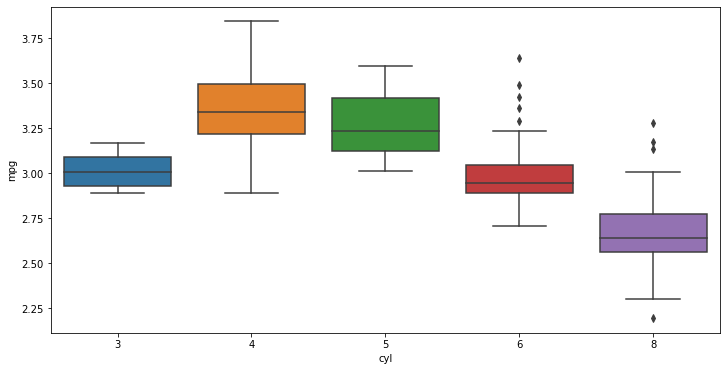

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(y='mpg',x='cyl',data=auto_df);

Good 'mpg' can be expected for 4 cylinder. 'mpg' drops when the number of cylinder increases

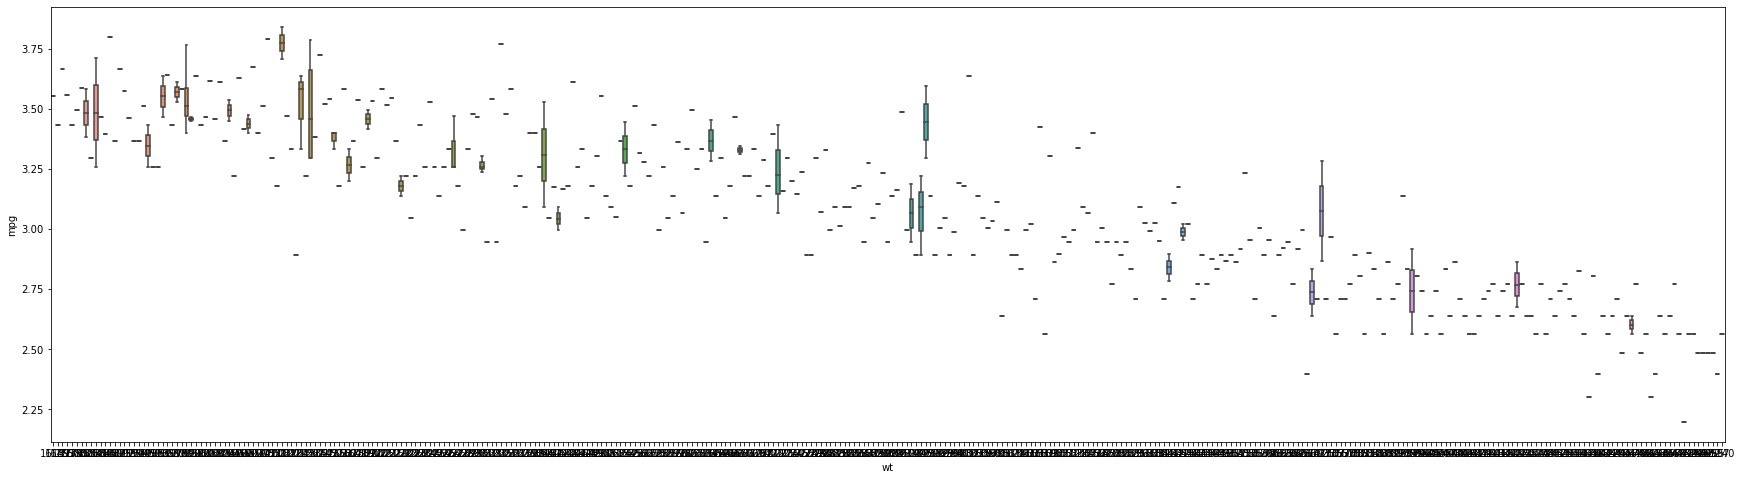

In [28]:
plt.figure(figsize=(30,8))
sns.boxplot(x='wt',y='mpg',data=auto_df);

With the increase in 'wt' 'mpg' of the vehicle decreases.

# Multivariate analysis

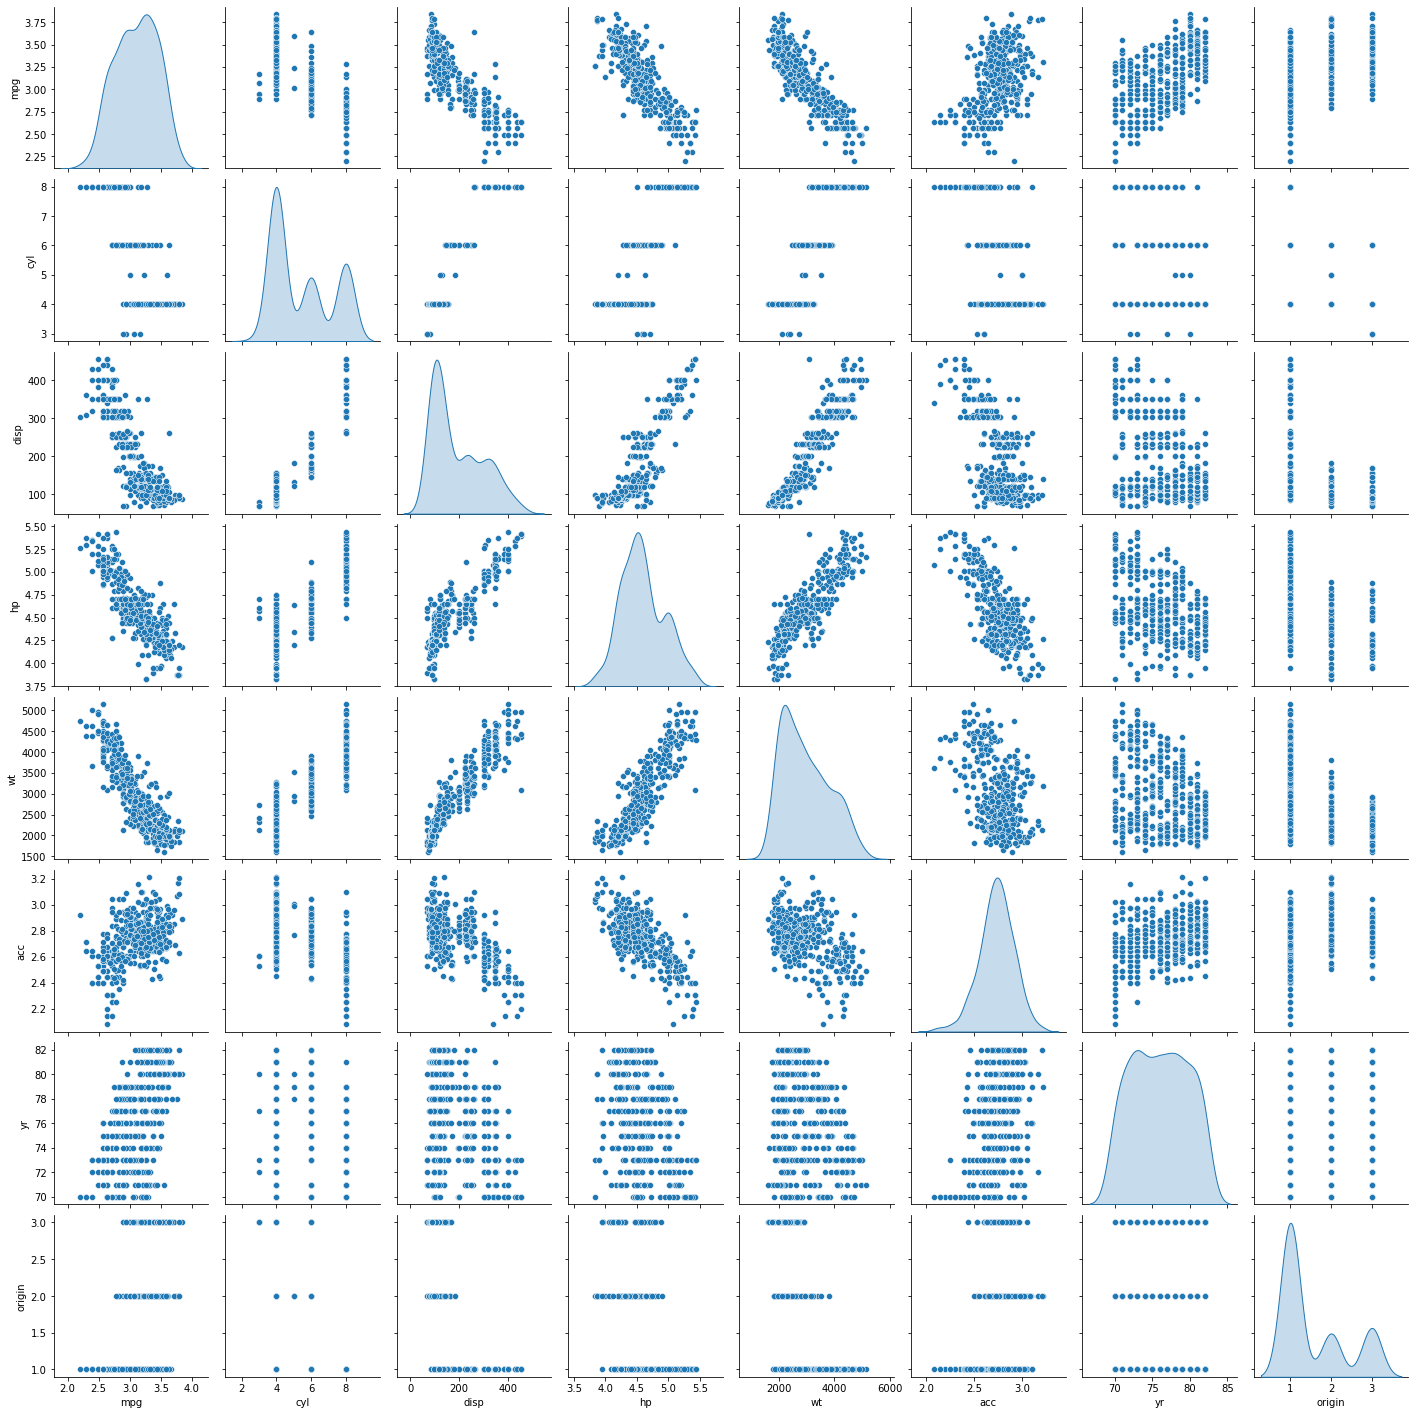

In [29]:
sns.pairplot(auto_df,diag_kind='kde');

From the above it can be seen that 'mpg' decreases with increase in 'cyl', increase in 'hp' and increase in 'wt'. 'disp' and 'hp' has inverse relatioship

In [30]:
auto_df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.825758,-0.853619,-0.842820,-0.875567,0.464053,0.576342,0.558329
cyl,-0.825758,1.000000,0.950721,0.837177,0.896017,-0.532968,-0.348746,-0.562543
disp,-0.853619,0.950721,1.000000,0.881030,0.932824,-0.579969,-0.370164,-0.609409
hp,-0.842820,0.837177,0.881030,1.000000,0.870764,-0.709862,-0.391037,-0.482030
wt,-0.875567,0.896017,0.932824,0.870764,1.000000,-0.442466,-0.306564,-0.581024
acc,0.464053,-0.532968,-0.579969,-0.709862,-0.442466,1.000000,0.310747,0.221091
yr,0.576342,-0.348746,-0.370164,-0.391037,-0.306564,0.310747,1.000000,0.180662
origin,0.558329,-0.562543,-0.609409,-0.482030,-0.581024,0.221091,0.180662,1.000000


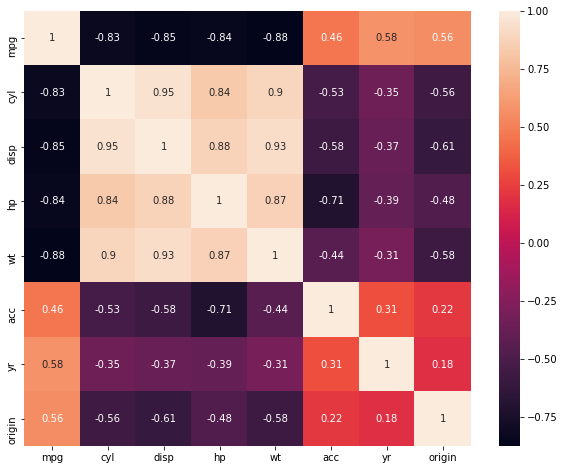

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(auto_df.corr(), annot=True);

'mpg' is negatively corelated with 'disp','hp','wt'.
'cyl' with respect to 'disp','hp','wt' is positively corelated.
'hp' is positively corelated with 'cyl','disp' and 'wt'.

In [32]:
#let us drop some columns which has least impact
# auto_df.drop(['yr','origin'],axis=1,inplace=True)
# auto_df.head()

In [33]:
auto_df_H = auto_df.copy()
auto_df_K = auto_df.copy()

# 4. Machine learning

# Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data

# K Means

In [34]:
from scipy.stats import zscore

In [35]:
auto_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,2.890372,8,307.0,4.867534,3504,2.484907,70,1
1,2.708050,8,350.0,5.105945,3693,2.442347,70,1
2,2.890372,8,318.0,5.010635,3436,2.397895,70,1
3,2.772589,8,304.0,5.010635,3433,2.484907,70,1
4,2.833213,8,302.0,4.941642,3449,2.351375,70,1


In [36]:
# let us proceed with the scaling of the data
auto_df_scaled = auto_df.apply(zscore)
auto_df_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.622035,1.498191,1.090604,0.818631,0.630870,-1.353748,-1.627426,-0.715145
1,-1.159493,1.498191,1.503514,1.518961,0.854333,-1.589535,-1.627426,-0.715145
2,-0.622035,1.498191,1.196232,1.238988,0.550470,-1.835805,-1.627426,-0.715145
3,-0.969242,1.498191,1.061796,1.238988,0.546923,-1.353748,-1.627426,-0.715145
4,-0.790530,1.498191,1.042591,1.036322,0.565841,-2.093533,-1.627426,-0.715145


# creating clusters

In [37]:
from sklearn.cluster import KMeans
cluster_num = range(1,11)         #will loop around taking up to 10 clusters
distortion = []
for number in cluster_num:
    clusters = KMeans(number,n_init=5)
    clusters.fit(auto_df_scaled)
    labels = clusters.labels_
    centroid = clusters.cluster_centers_
    distortion.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'number':cluster_num, 'distortion':distortion})
clusters_df

,number,distortion
0,1,3184.000000
1,2,1553.376557
2,3,1165.243878
3,4,973.032012
4,5,814.372567
5,6,737.561899
6,7,673.167764
7,8,629.364185
8,9,590.773736
9,10,570.646839


Text(0, 0.5, 'within group sum od squared errors')

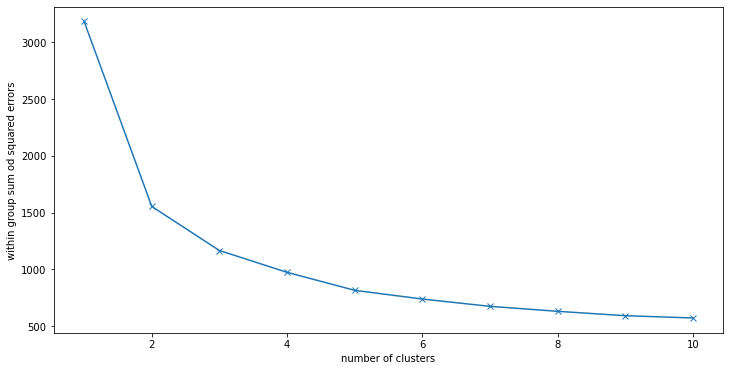

In [38]:
#let us see the optimum number of clusters by plotting wss w.r.t no. of cluster
plt.figure(figsize=(12,6))
plt.plot(clusters_df.number,clusters_df.distortion,marker = "x")
plt.xlabel('number of clusters')
plt.ylabel('within group sum od squared errors')

The bend happened between 3 and 4. Hence, optimum number of clusters can be choosen 4 for the current dataset.

In [39]:
# will use number of cluster=4
kmeans = KMeans(n_clusters=4,n_init=5,random_state=27)
kmeans.fit(auto_df_scaled)

KMeans(n_clusters=4, n_init=5, random_state=27)

In [40]:
# number of datapoints in each cluster
labels = kmeans.labels_
counts = np.bincount(labels)
print(counts)

[ 86 115  94 103]


In [41]:
# checking centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns=list(auto_df))
centroid_df.T

,0,1,2,3
mpg,-0.416938,1.061946,-1.306300,0.354612
cyl,0.430448,-0.800017,1.498191,-0.833461
disp,0.349531,-0.754426,1.503923,-0.822033
hp,0.094906,-0.760961,1.437631,-0.541637
wt,0.349733,-0.713785,1.404098,-0.776476
acc,0.363629,0.407718,-1.150226,0.290889
yr,-0.018465,1.115735,-0.688324,-0.602127
origin,-0.671597,0.402958,-0.715145,0.763503


Grouped data in the different clusters for Kmeans clustering.

In [42]:
# attaching the clusters formed to the scaled data
auto_df_scaled['clusters_K'] = labels
Kclus=auto_df_scaled
auto_df_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,clusters_K
0,-0.622035,1.498191,1.090604,0.818631,0.630870,-1.353748,-1.627426,-0.715145,2
1,-1.159493,1.498191,1.503514,1.518961,0.854333,-1.589535,-1.627426,-0.715145,2
2,-0.622035,1.498191,1.196232,1.238988,0.550470,-1.835805,-1.627426,-0.715145,2
3,-0.969242,1.498191,1.061796,1.238988,0.546923,-1.353748,-1.627426,-0.715145,2
4,-0.790530,1.498191,1.042591,1.036322,0.565841,-2.093533,-1.627426,-0.715145,2


In [43]:
#vieweing the distribution of clusters
auto_df_scaled.clusters_K.value_counts().sort_index()

0     86
1    115
2     94
3    103
Name: clusters_K, dtype: int64

In [44]:
#attaching the clusters formed to the original data
auto_df_K['clusters_K'] = labels
auto_df_K.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,clusters_K
0,2.890372,8,307.0,4.867534,3504,2.484907,70,1,2
1,2.708050,8,350.0,5.105945,3693,2.442347,70,1,2
2,2.890372,8,318.0,5.010635,3436,2.397895,70,1,2
3,2.772589,8,304.0,5.010635,3433,2.484907,70,1,2
4,2.833213,8,302.0,4.941642,3449,2.351375,70,1,2


In [45]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=auto_df_K.groupby('clusters_K').mean()
aggdata.T

clusters_K,0,1,2,3
mpg,2.959947,3.461628,2.658249,3.221679
cyl,6.186047,4.095652,8.000000,4.038835
disp,229.825581,114.860870,350.042553,107.820388
hp,4.621159,4.329799,5.078259,4.404463
wt,3266.220930,2366.721739,4157.978723,2313.699029
acc,2.794893,2.802852,2.521642,2.781764
yr,75.941860,80.130435,73.468085,73.786408
origin,1.034884,1.895652,1.000000,2.184466


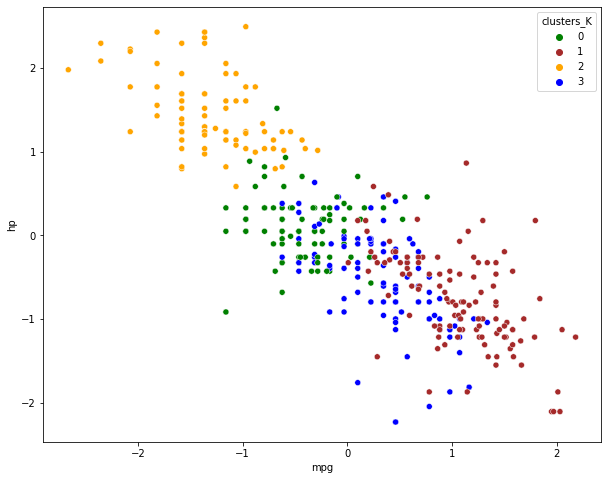

In [46]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="clusters_K",
              data=auto_df_scaled, 
                    palette=['green','brown','orange','blue']);

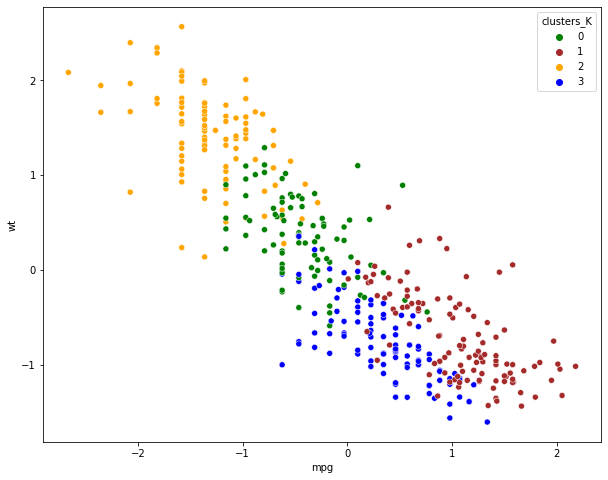

In [47]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="wt", hue="clusters_K",
              data=auto_df_scaled, 
                    palette=['green','brown','orange','blue']);

# Hierarchical

In [48]:
# Let us create dendrogram
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [49]:
Z = linkage(auto_df_scaled,metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(auto_df_scaled))
c

0.783180459955049

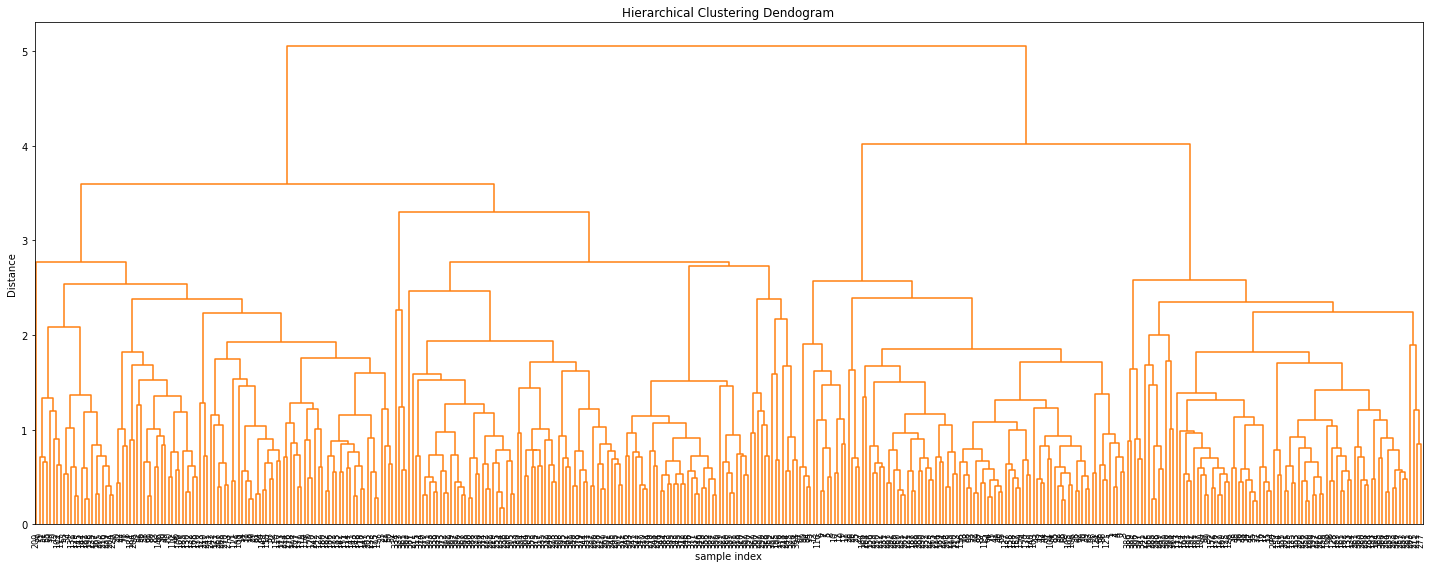

In [50]:
plt.figure(figsize=(20,8))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

There is a huge number of trees. Let us cut the dendrogram to get 2 clusters.

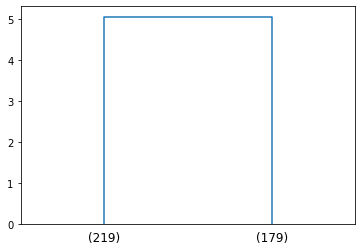

In [51]:
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=2,  
)
plt.show()

In [52]:
#vieweing the clusters formed
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 2, criterion='maxclust')

In [53]:
#attaching the clusters formed to the scales data
auto_df_scaled['clusters_H'] = clusters
auto_df_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,clusters_K,clusters_H
0,-0.622035,1.498191,1.090604,0.818631,0.630870,-1.353748,-1.627426,-0.715145,2,2
1,-1.159493,1.498191,1.503514,1.518961,0.854333,-1.589535,-1.627426,-0.715145,2,2
2,-0.622035,1.498191,1.196232,1.238988,0.550470,-1.835805,-1.627426,-0.715145,2,2
3,-0.969242,1.498191,1.061796,1.238988,0.546923,-1.353748,-1.627426,-0.715145,2,2
4,-0.790530,1.498191,1.042591,1.036322,0.565841,-2.093533,-1.627426,-0.715145,2,2


In [54]:
auto_df_scaled['clusters_H'].value_counts()

1    219
2    179
Name: clusters_H, dtype: int64

In [55]:
#attaching the clusters formed to the original data
auto_df_H['clusters_H']=clusters
auto_df_H.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,clusters_H
0,2.890372,8,307.0,4.867534,3504,2.484907,70,1,2
1,2.708050,8,350.0,5.105945,3693,2.442347,70,1,2
2,2.890372,8,318.0,5.010635,3436,2.397895,70,1,2
3,2.772589,8,304.0,5.010635,3433,2.484907,70,1,2
4,2.833213,8,302.0,4.941642,3449,2.351375,70,1,2


In [56]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=auto_df_H.groupby('clusters_H').mean()
aggdata['Freq']=auto_df_H.clusters_H.value_counts().sort_index()
aggdata.T

clusters_H,1,2
mpg,3.347325,2.800484
cyl,4.068493,7.150838
disp,111.737443,293.368715
hp,4.366395,4.861017
wt,2343.511416,3737.430168
acc,2.792991,2.651284
yr,77.136986,74.631285
origin,2.027397,1.016760
Freq,219.000000,179.000000


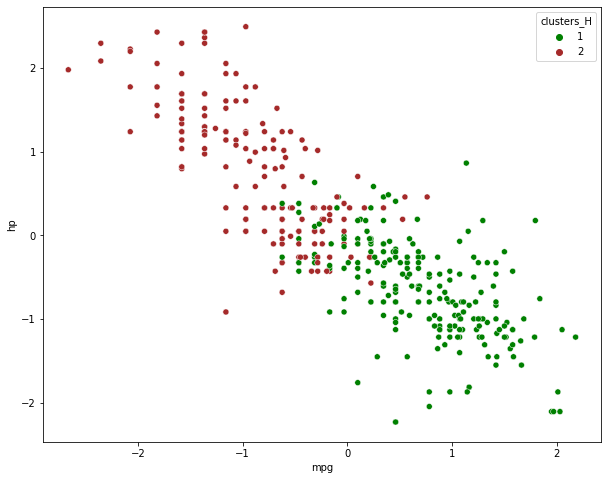

In [57]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="clusters_H",
              data=auto_df_scaled, 
                    palette=['green','brown']);

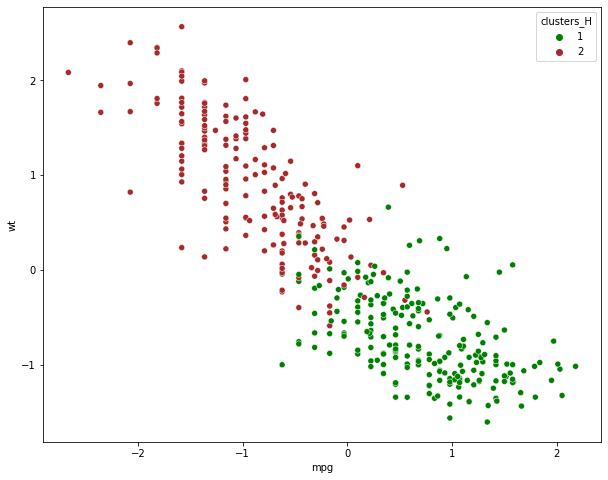

In [58]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="wt", hue="clusters_H",
              data=auto_df_scaled, 
                    palette=['green','brown']);

# Share your insights about the difference in using these two methods

# 5. Answer below questions based on outcomes of using ML based methods

# Mention how many optimal clusters are present in the data and what could be the possible reason behind it

# Use linear regression model on different clusters separately and print the coefficients of the models individually

# Linear regression model for original dataset

In [59]:
auto_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,2.890372,8,307.0,4.867534,3504,2.484907,70,1
1,2.708050,8,350.0,5.105945,3693,2.442347,70,1
2,2.890372,8,318.0,5.010635,3436,2.397895,70,1
3,2.772589,8,304.0,5.010635,3433,2.484907,70,1
4,2.833213,8,302.0,4.941642,3449,2.351375,70,1


In [60]:
# segregating the independent and target variable
X = auto_df.drop(['mpg'],axis=1)   # independent attributes
y = auto_df['mpg']                 # target variable

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=27)

In [62]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

In [63]:
for idx, col_name in enumerate(X_train.columns):
    print(f'''The coefficient for {col_name} is {LR.coef_[idx]}''')

The coefficient for cyl is -0.004394840831816156
The coefficient for disp is -0.00017086977539165153
The coefficient for hp is -0.31035881479630417
The coefficient for wt is -0.00018398089865006564
The coefficient for acc is -0.1861945928626451
The coefficient for yr is 0.03058511368627384
The coefficient for origin is 0.029318267425376132


In [64]:
print(f''' Intercept value is {LR.intercept_}''')
print(f''' regression model score for training set is {LR.score(X_train,y_train)}''')
print(f''' regression model score for testing set is {LR.score(X_test,y_test)}''')

 Intercept value is 3.263428119726299
 regression model score for training set is 0.8740500536707108
 regression model score for testing set is 0.9033257007876581


# Linear Regression model for Kmeans clustering 

# Use linear regression model on different clusters separately and print the coefficients of the models individually

In [65]:
auto_df_K.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,clusters_K
0,2.890372,8,307.0,4.867534,3504,2.484907,70,1,2
1,2.708050,8,350.0,5.105945,3693,2.442347,70,1,2
2,2.890372,8,318.0,5.010635,3436,2.397895,70,1,2
3,2.772589,8,304.0,5.010635,3433,2.484907,70,1,2
4,2.833213,8,302.0,4.941642,3449,2.351375,70,1,2


In [66]:
auto_df_K['clusters_K'].unique()

array([2, 3, 0, 1])

In [67]:
auto_df_K['clusters_K'].value_counts()

1    115
3    103
2     94
0     86
Name: clusters_K, dtype: int64

since,there are 4 clusters. We will fit the LR model seperately for each clusters.

In [68]:
# for cluster 0
auto_df_K0 = auto_df_K.loc[auto_df_K['clusters_K']==0]
# segregating the independent and target variable
X = auto_df_K0.drop(['mpg'],axis=1)    # independent attributes
y = auto_df_K0['mpg']                  # target variable

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=27)

In [70]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

In [71]:
for idx, col_name in enumerate(X_train.columns):
    print(f'''The coefficient for {col_name} is {LR.coef_[idx]}''')

The coefficient for cyl is 0.07897943392354909
The coefficient for disp is -0.0004861569779494263
The coefficient for hp is -0.02784412621427459
The coefficient for wt is -0.0002032968601886646
The coefficient for acc is -0.12721780836214158
The coefficient for yr is 0.01985589157199118
The coefficient for origin is -0.22655405351978916
The coefficient for clusters_K is 0.0


In [72]:
print(f''' Intercept value is {LR.intercept_}''')
print(f''' regression model score for training set is {LR.score(X_train,y_train)}''')
print(f''' regression model score for testing set is {LR.score(X_test,y_test)}''')

 Intercept value is 2.4615137834514913
 regression model score for training set is 0.5146516830564227
 regression model score for testing set is 0.4389712113640011


In [73]:
# for cluster 1
auto_df_K1 = auto_df_K.loc[auto_df_K['clusters_K']==1]
# segregating the independent and target variable
X = auto_df_K1.drop(['mpg'],axis=1)    # independent attributes
y = auto_df_K1['mpg']                  # target variable

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=27)

In [75]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

In [76]:
for idx, col_name in enumerate(X_train.columns):
    print(f'''The coefficient for {col_name} is {LR.coef_[idx]}''')

The coefficient for cyl is 0.0065360703834413565
The coefficient for disp is -0.0020769775806596925
The coefficient for hp is -0.2591959827605213
The coefficient for wt is -9.708017752097734e-05
The coefficient for acc is -0.045857305835164945
The coefficient for yr is 0.022481985599076482
The coefficient for origin is 0.03279360402191813
The coefficient for clusters_K is 0.0


In [77]:
print(f''' Intercept value is {LR.intercept_}''')
print(f''' regression model score for training set is {LR.score(X_train,y_train)}''')
print(f''' regression model score for testing set is {LR.score(X_test,y_test)}''')

 Intercept value is 3.300350602396794
 regression model score for training set is 0.6123428614941098
 regression model score for testing set is -0.01478855144684621


For the cluster 1 there is a huge difference between training and testing accuracy.

In [78]:
# for cluster 2
auto_df_K2 = auto_df_K.loc[auto_df_K['clusters_K']==2]
# segregating the independent and target variable
X = auto_df_K2.drop(['mpg'],axis=1)    # independent attributes
y = auto_df_K2['mpg']                  # target variable

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=27)

In [80]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

In [81]:
for idx, col_name in enumerate(X_train.columns):
    print(f'''The coefficient for {col_name} is {LR.coef_[idx]}''')

The coefficient for cyl is 0.0
The coefficient for disp is 0.00013047959736211208
The coefficient for hp is -0.39757318058900254
The coefficient for wt is -6.362324765398262e-05
The coefficient for acc is -0.4776114595016824
The coefficient for yr is 0.023109452068030018
The coefficient for origin is 0.0
The coefficient for clusters_K is 0.0


In [82]:
print(f''' Intercept value is {LR.intercept_}''')
print(f''' regression model score for training set is {LR.score(X_train,y_train)}''')
print(f''' regression model score for testing set is {LR.score(X_test,y_test)}''')

 Intercept value is 4.404567504210985
 regression model score for training set is 0.5347117618220298
 regression model score for testing set is 0.6546788029351074


In [83]:
# for cluster 3
auto_df_K3 = auto_df_K.loc[auto_df_K['clusters_K']==3]
# segregating the independent and target variable
X = auto_df_K3.drop(['mpg'],axis=1)    # independent attributes
y = auto_df_K3['mpg']                  # target variable

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=27)

In [85]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

In [86]:
for idx, col_name in enumerate(X_train.columns):
    print(f'''The coefficient for {col_name} is {LR.coef_[idx]}''')

The coefficient for cyl is 0.2455619391201946
The coefficient for disp is -0.001028774664502256
The coefficient for hp is -0.2212448101392654
The coefficient for wt is -0.00021444816222168368
The coefficient for acc is -0.19791338925913668
The coefficient for yr is 0.0007726149652833536
The coefficient for origin is 0.014181557272452901
The coefficient for clusters_K is 0.0


In [87]:
print(f''' Intercept value is {LR.intercept_}''')
print(f''' regression model score for training set is {LR.score(X_train,y_train)}''')
print(f''' regression model score for testing set is {LR.score(X_test,y_test)}''')

 Intercept value is 4.2926628135605585
 regression model score for training set is 0.6427299359913217
 regression model score for testing set is -0.40475275485260487


For third cluster also there is a huge difference in training and testing accuracy can be seen

# Linear Regression model for Hierarchial clustering

In [88]:
auto_df_H.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,clusters_H
0,2.890372,8,307.0,4.867534,3504,2.484907,70,1,2
1,2.708050,8,350.0,5.105945,3693,2.442347,70,1,2
2,2.890372,8,318.0,5.010635,3436,2.397895,70,1,2
3,2.772589,8,304.0,5.010635,3433,2.484907,70,1,2
4,2.833213,8,302.0,4.941642,3449,2.351375,70,1,2


In [89]:
auto_df_H['clusters_H'].unique()

array([2, 1], dtype=int32)

Since, there are two clusters formed in hierarchial clustering, we will fit the model, predict the result and print the coefficient  seperately for two clusters i.e. cluster 1 and cluster 2

In [90]:
# for cluster 1
auto_df_H1 = auto_df_H.loc[auto_df_H['clusters_H']==1]
# segregating the independent and target variable
X = auto_df_H1.drop(['mpg'],axis=1)    # independent attributes
y = auto_df_H1['mpg']                  # target variable

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=27)

In [92]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

In [93]:
for idx, col_name in enumerate(X_train.columns):
    print(f'''The coefficient for {col_name} is {LR.coef_[idx]}''')

The coefficient for cyl is 0.06493744040324204
The coefficient for disp is -1.863101770674188e-05
The coefficient for hp is -0.18467976142151418
The coefficient for wt is -0.00027241159213572047
The coefficient for acc is 0.025833599445068217
The coefficient for yr is 0.0306768729892002
The coefficient for origin is 0.00992434406859763
The coefficient for clusters_H is 0.0


In [94]:
print(f''' Intercept value is {LR.intercept_}''')
print(f''' regression model score for training set is {LR.score(X_train,y_train)}''')
print(f''' regression model score for testing set is {LR.score(X_test,y_test)}''')

 Intercept value is 2.0741669612981264
 regression model score for training set is 0.6850342583399394
 regression model score for testing set is 0.7249647089037246


In [95]:
# for cluster 2
auto_df_H2 = auto_df_H.loc[auto_df_H['clusters_H']==2]
# segregating the independent and target variable
X = auto_df_H2.drop(['mpg'],axis=1)    # independent attributes
y = auto_df_H2['mpg']                  # target variable

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=27)

In [97]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

In [98]:
for idx, col_name in enumerate(X_train.columns):
    print(f'''The coefficient for {col_name} is {LR.coef_[idx]}''')

The coefficient for cyl is -0.028792380152930418
The coefficient for disp is -0.00038338627947518794
The coefficient for hp is -0.25779306531202023
The coefficient for wt is -0.0001284975937663849
The coefficient for acc is -0.395180095279289
The coefficient for yr is 0.024385822619651963
The coefficient for origin is -0.05872367313444948
The coefficient for clusters_H is 0.0


In [99]:
print(f''' Intercept value is {LR.intercept_}''')
print(f''' regression model score for training set is {LR.score(X_train,y_train)}''')
print(f''' regression model score for testing set is {LR.score(X_test,y_test)}''')

 Intercept value is 4.142284849658264
 regression model score for training set is 0.7618665954389958
 regression model score for testing set is 0.684170400493276


# How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

# 6. Improvisation

# Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to perform a better data analysis in future

# PART-II (DOMAIN: Manufacturing)- Wine quality prediction

# Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

In [100]:
# importing libraries
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [101]:
wdf = pd.read_excel('Part2 - Company.xlsx')
wdf.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [102]:
#size of the dataset
wdf.shape
print(f'''The datset has {wdf.shape[0]} rows and {wdf.shape[1]} columns''')

The datset has 61 rows and 5 columns


In [103]:
# dataypes of the attributes
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [104]:
# checking for null values
wdf.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

There are 18 null values found in the dataset

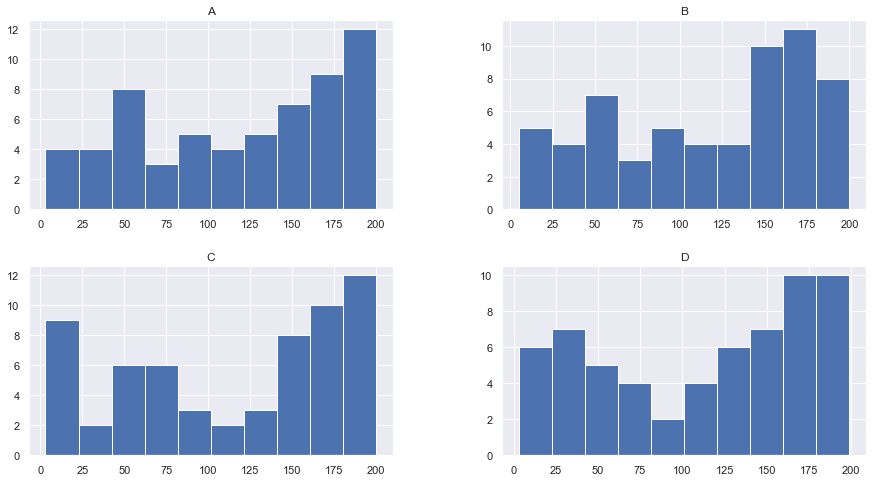

In [105]:
wdf.hist(figsize=(15,8));

<Figure size 1440x576 with 0 Axes>

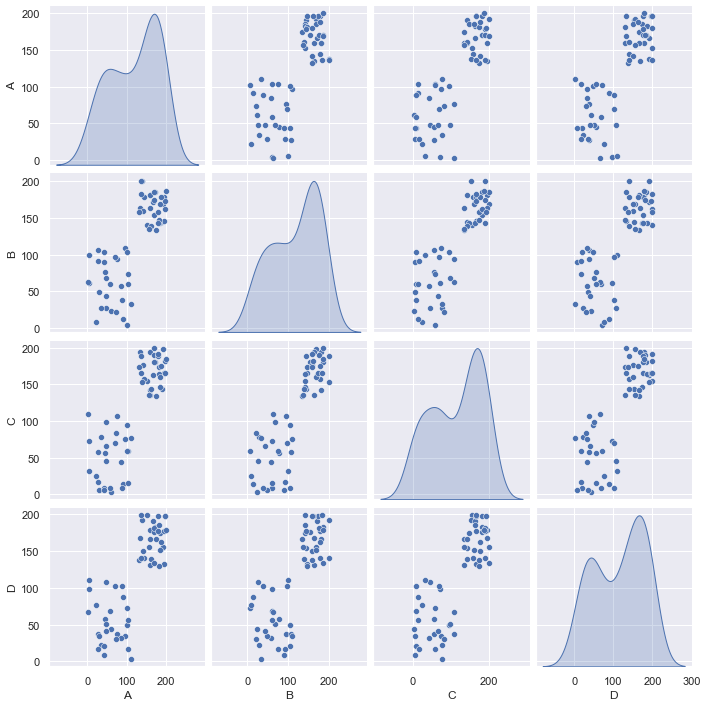

In [106]:
plt.figure(figsize=(20,8));
sns.pairplot(wdf,diag_kind='kde');

distribution is not normal and values in terms of scaling is not too much deviated.

In [107]:
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [108]:
# droping the target variable
wdf1 = wdf.drop(['Quality'],axis=1)
wdf1.head()

,A,B,C,D
0,47,27,45,108
1,174,133,134,166
2,159,163,135,131
3,61,23,3,44
4,59,60,9,68


In [109]:
# feature Scaling
wdf_scaled = wdf1.apply(zscore)
wdf_scaled.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [110]:
cluster_num = range(1,5)         #will loop around taking up to 10 clusters
distortion = []
for number in cluster_num:
    clusters = KMeans(number,n_init=5)
    clusters.fit(wdf_scaled)
    labels = clusters.labels_
    centroid = clusters.cluster_centers_
    distortion.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'number':cluster_num, 'distortion':distortion})
clusters_df

,number,distortion
0,1,244.000000
1,2,45.522552
2,3,37.604047
3,4,34.753192


Text(0, 0.5, 'within group sum od squared errors')

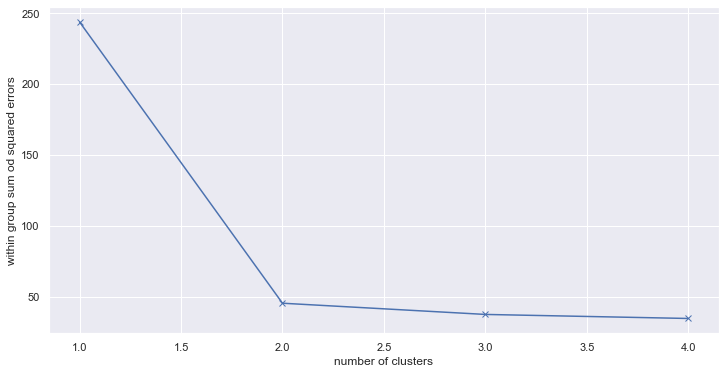

In [111]:
#let us see the optimum number of clusters by plotting wss w.r.t no. of cluster
plt.figure(figsize=(12,6))
plt.plot(clusters_df.number,clusters_df.distortion,marker = "x")
plt.xlabel('number of clusters')
plt.ylabel('within group sum od squared errors')

In [112]:
# let us form 2 clusters using Kmeans
k_means = KMeans(n_clusters = 2)
k_means.fit(wdf_scaled)
labels = k_means.labels_
print(f''' silhouette_score of the  cluster formed is :{silhouette_score(wdf_scaled,labels)}''')

 silhouette_score of the  cluster formed is :0.6891674125195145


In [113]:
# will combine the clusters for the original  wine dataframe
wdf['K_cluster'] = labels
wdf.head(20)

,A,B,C,D,Quality,K_cluster
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0
5,153,140,154,199,NaN,1
6,34,28,78,22,Quality A,0
7,191,144,143,154,NaN,1
8,160,181,194,178,Quality B,1
9,145,178,158,141,NaN,1


In [114]:
# RENAMING THE GROUPING 1 & 0 BY 'QUALITY 1' 7 'QUALITY 0' RESPECTIVELY
wdf['K_cluster'] = wdf['K_cluster'].replace({1:'Quality A', 0:'Quality B'})
wdf.head(25)

,A,B,C,D,Quality,K_cluster
0,47,27,45,108,Quality A,Quality B
1,174,133,134,166,Quality B,Quality A
2,159,163,135,131,NaN,Quality A
3,61,23,3,44,Quality A,Quality B
4,59,60,9,68,Quality A,Quality B
5,153,140,154,199,NaN,Quality A
6,34,28,78,22,Quality A,Quality B
7,191,144,143,154,NaN,Quality A
8,160,181,194,178,Quality B,Quality A
9,145,178,158,141,NaN,Quality A


Comparing the original target variable with the newly formed cluster's value. It was found that the  target variable and the newly formed clusters value matches excatly. We can sucessfully replace the missing entries in the old target variable with the new one column of Cluster. 

In [115]:
#replacing null values with the corresponding values from K_cluster
wdf.Quality.fillna(wdf.K_cluster,inplace=True)
wdf.head(25)

,A,B,C,D,Quality,K_cluster
0,47,27,45,108,Quality A,Quality B
1,174,133,134,166,Quality B,Quality A
2,159,163,135,131,Quality A,Quality A
3,61,23,3,44,Quality A,Quality B
4,59,60,9,68,Quality A,Quality B
5,153,140,154,199,Quality A,Quality A
6,34,28,78,22,Quality A,Quality B
7,191,144,143,154,Quality A,Quality A
8,160,181,194,178,Quality B,Quality A
9,145,178,158,141,Quality A,Quality A


Missing values (null values) has been replaced with the corresponding values from the cluster column

# PART-III (DOMAIN: Automobile)- classifying  given silhouette as one of three types of vehicle

In [116]:
#import libraries
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [117]:
vdf = pd.read_csv('Part3 - vehicle.csv')
vdf.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [118]:
#size of the dataset
vdf.shape
print(f'''The datset has {vdf.shape[0]} rows and {vdf.shape[1]} columns''')

The datset has 846 rows and 19 columns


In [119]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

all the attributes are numeric except 'class'

In [120]:
vdf.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [121]:
# Handling missing values
for col in vdf.columns:
    if (col!='class'):
        vdf[col] = vdf[col].fillna(vdf[col].median())

In [122]:
#checking for missing values once again
vdf.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

all the missing values are imputed with median values.

In [123]:
vdf.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


Distribution is found normal for most of the attributes.

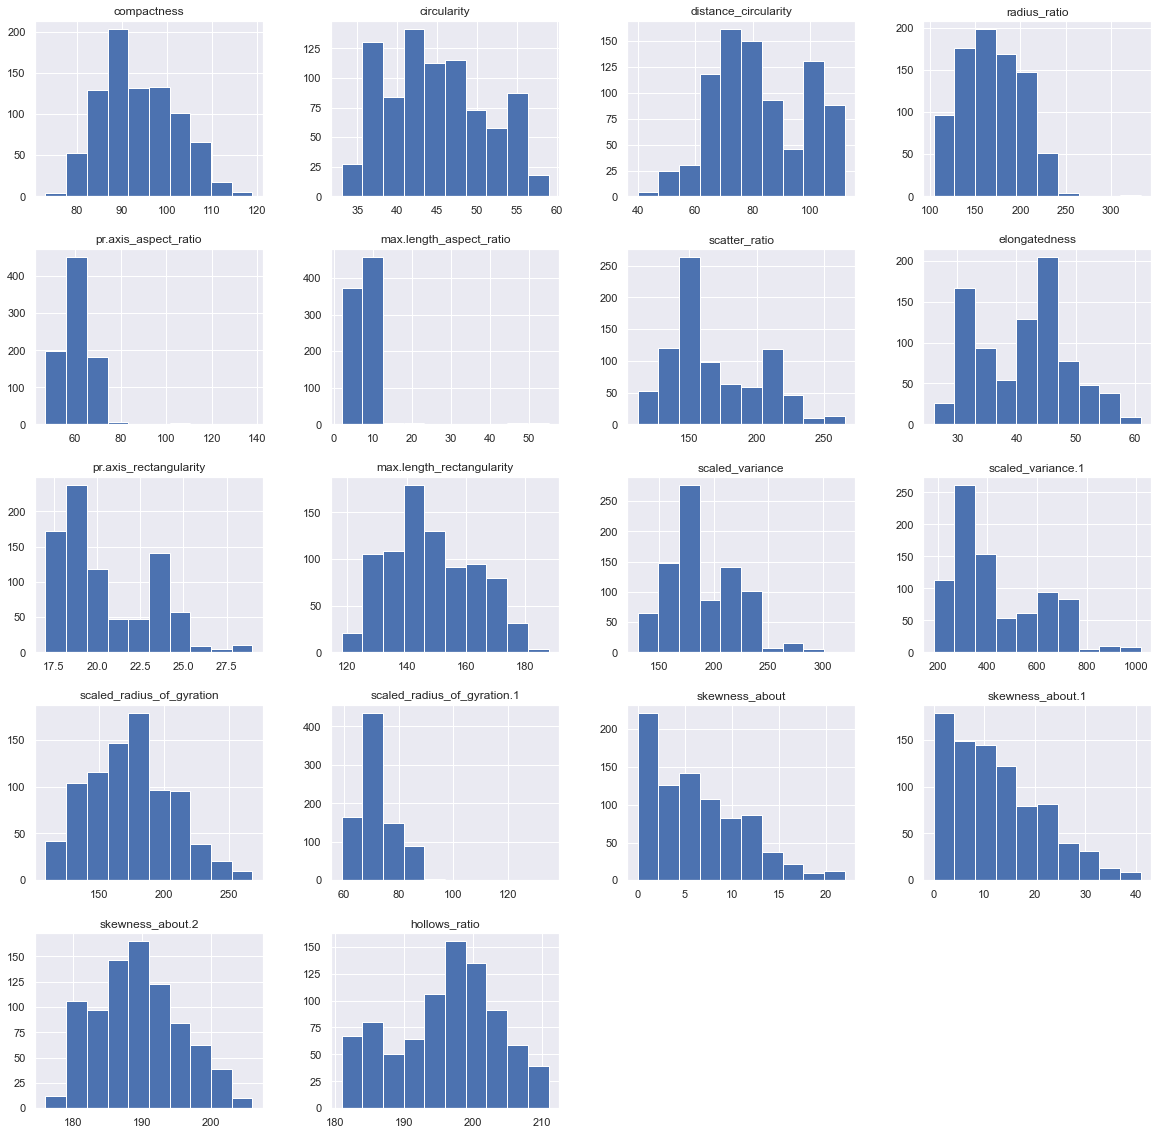

In [124]:
vdf.hist(figsize=(20,20));

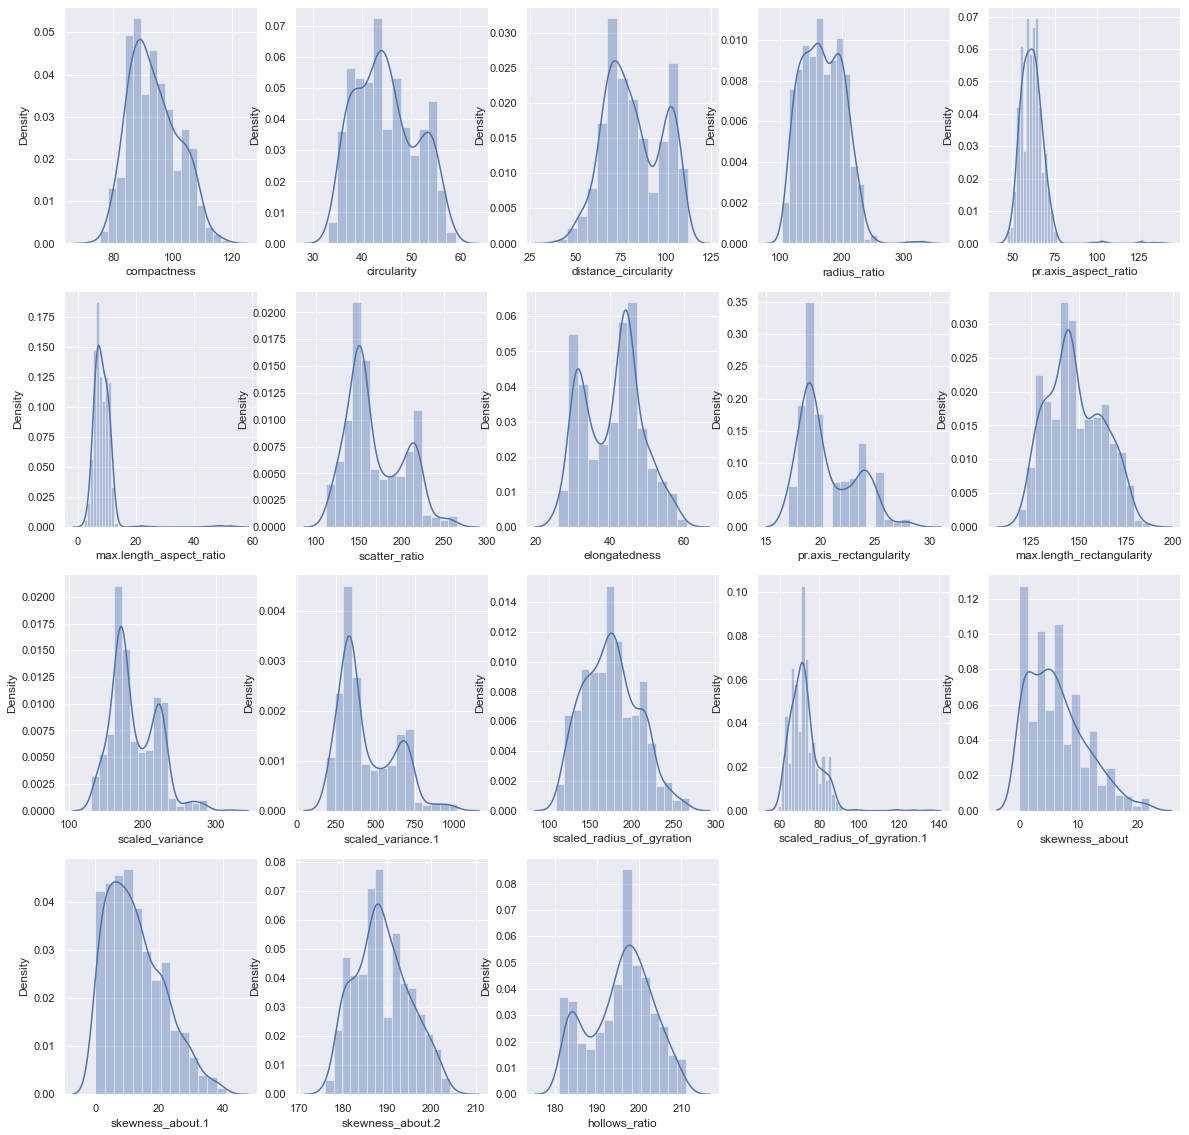

In [125]:
# Density plots
plt.figure(figsize=(20, 20))
col = 1
for i in vdf.drop(columns='class').columns:
    plt.subplot(4, 5, col)
    sns.distplot(vdf[i], color = 'b')
    col += 1 

car    429
bus    218
van    199
Name: class, dtype: int64


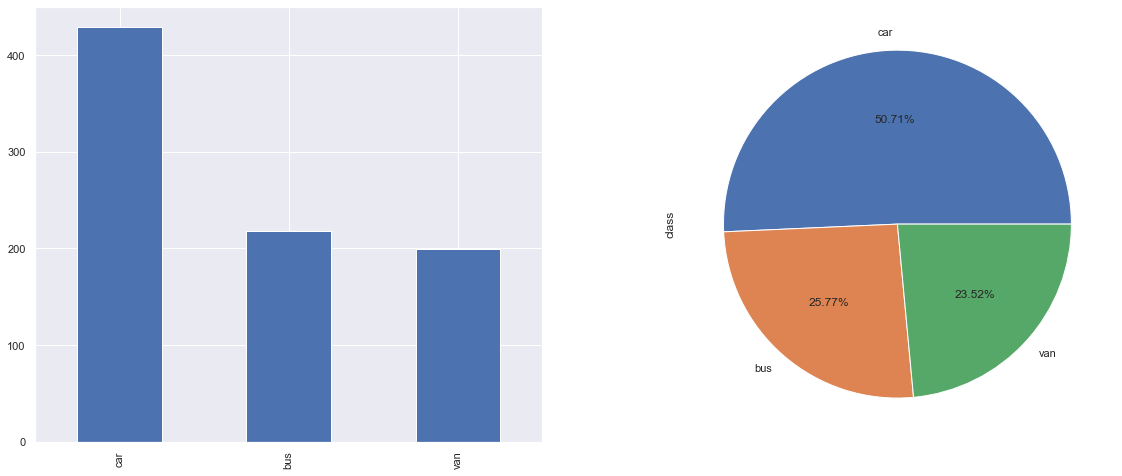

In [126]:
# checking for target variable distribution.
plt.figure(figsize=(20, 8))
print(vdf['class'].value_counts())
plt.subplot(1,2,1)
vdf['class'].value_counts().plot(kind='bar');

plt.subplot(1,2,2)
vdf['class'].value_counts().plot.pie(autopct='%1.2f%%');

The distribution of vehicle follows in the order Car of about 50.71% followed by bus of 25.77% and van of 23.52%. 

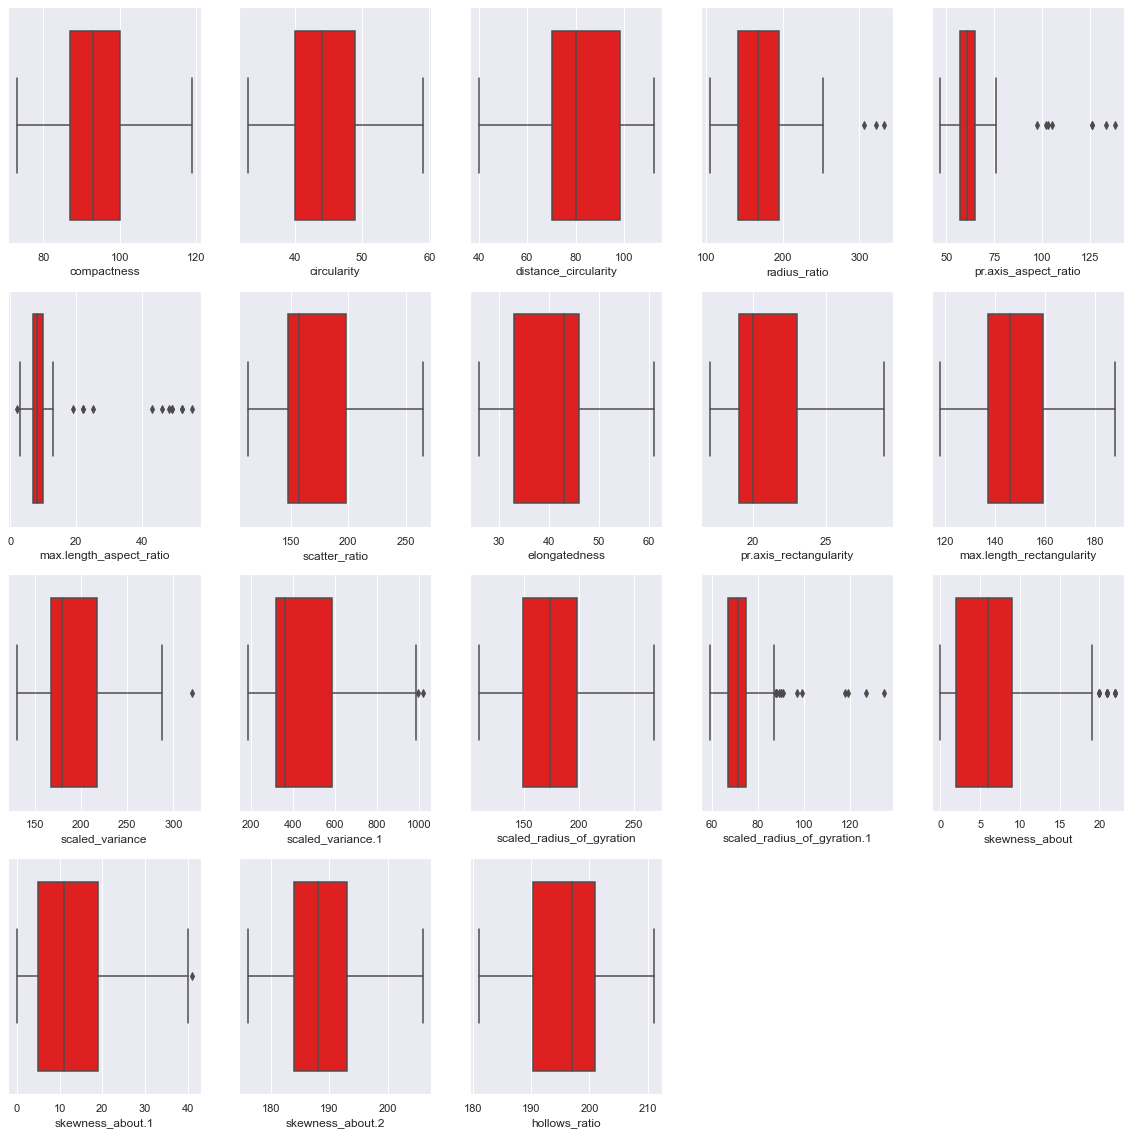

In [127]:
# Box plot to check for the outliers
plt.figure(figsize=(20,20))
col=1
for i in vdf.drop(columns='class').columns:
    plt.subplot(4,5,col)
    sns.boxplot(vdf[i],color='red')
    col +=1

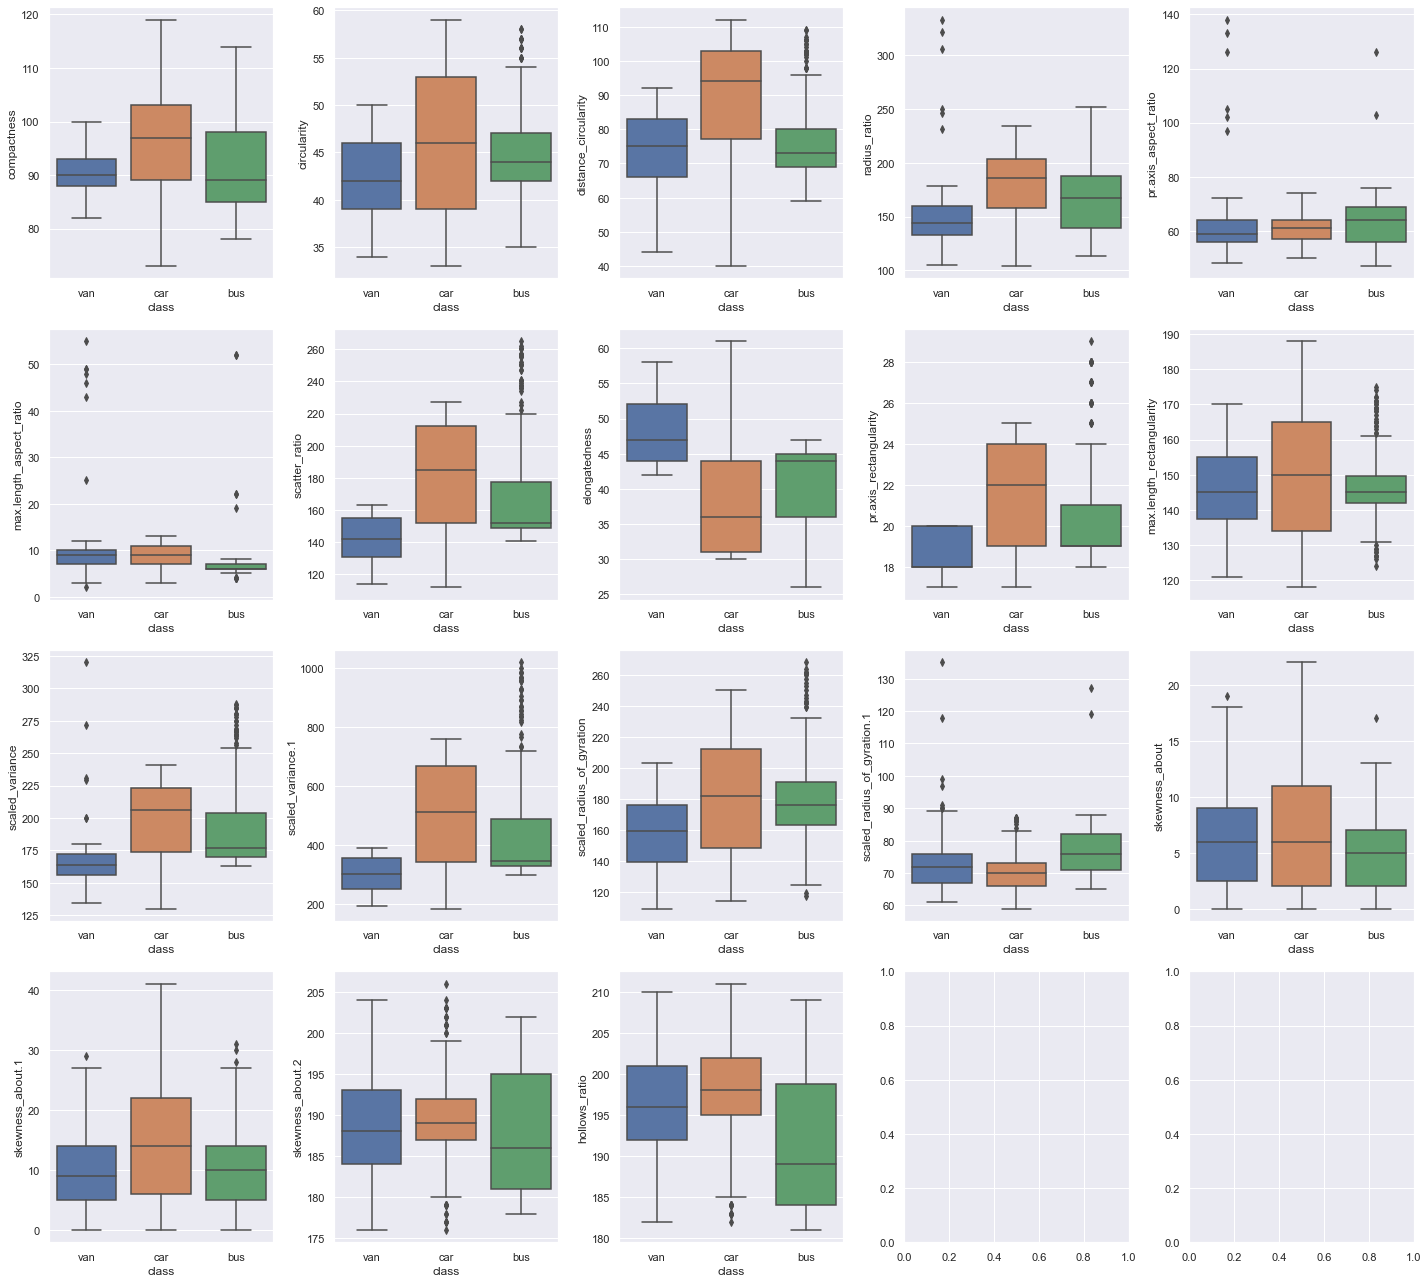

In [128]:
#Boxplots against the class with other numeric variables
fig,axs = plt.subplots(4,5,figsize=(20,18))
sns.boxplot(x="class", y="compactness",data=vdf,ax=axs[0,0]);
sns.boxplot(x="class", y="circularity",data=vdf,ax=axs[0,1]);
sns.boxplot(x="class", y="distance_circularity",data=vdf,ax=axs[0,2]);
sns.boxplot(x="class", y="radius_ratio",data=vdf,ax=axs[0,3]);
sns.boxplot(x="class", y="pr.axis_aspect_ratio",data=vdf,ax=axs[0,4]);
sns.boxplot(x="class", y="max.length_aspect_ratio",data=vdf,ax=axs[1,0]);
sns.boxplot(x="class", y="scatter_ratio",data=vdf,ax=axs[1,1]);
sns.boxplot(x="class", y="elongatedness",data=vdf,ax=axs[1,2]);
sns.boxplot(x="class", y="pr.axis_rectangularity",data=vdf,ax=axs[1,3]);
sns.boxplot(x="class", y="max.length_rectangularity",data=vdf,ax=axs[1,4]);
sns.boxplot(x="class", y="scaled_variance",data=vdf,ax=axs[2,0]);
sns.boxplot(x="class", y="scaled_variance.1",data=vdf,ax=axs[2,1]);
sns.boxplot(x="class", y="scaled_radius_of_gyration",data=vdf,ax=axs[2,2]);
sns.boxplot(x="class", y="scaled_radius_of_gyration.1",data=vdf,ax=axs[2,3]);
sns.boxplot(x="class", y="skewness_about",data=vdf,ax=axs[2,4]);
sns.boxplot(x="class", y="skewness_about.1",data=vdf,ax=axs[3,0]);
sns.boxplot(x="class", y="skewness_about.2",data=vdf,ax=axs[3,1]);
sns.boxplot(x="class", y="hollows_ratio",data=vdf,ax=axs[3,2]);
fig.tight_layout()

There is significant difference between classes when compared with the mean and median with all the numeric attributes

In [129]:
# imputing outliers with median
for col in vdf.drop(columns='class').columns:
    q1 = vdf[col].quantile(0.25)
    q3 = vdf[col].quantile(0.75)
    iqr = q3-q1
    
    low = q1 - 1.5*iqr
    hig = q3 + 1.5*iqr
    
    vdf.loc[(vdf[col]<low) | (vdf[col]>hig),col] = vdf[col].median()

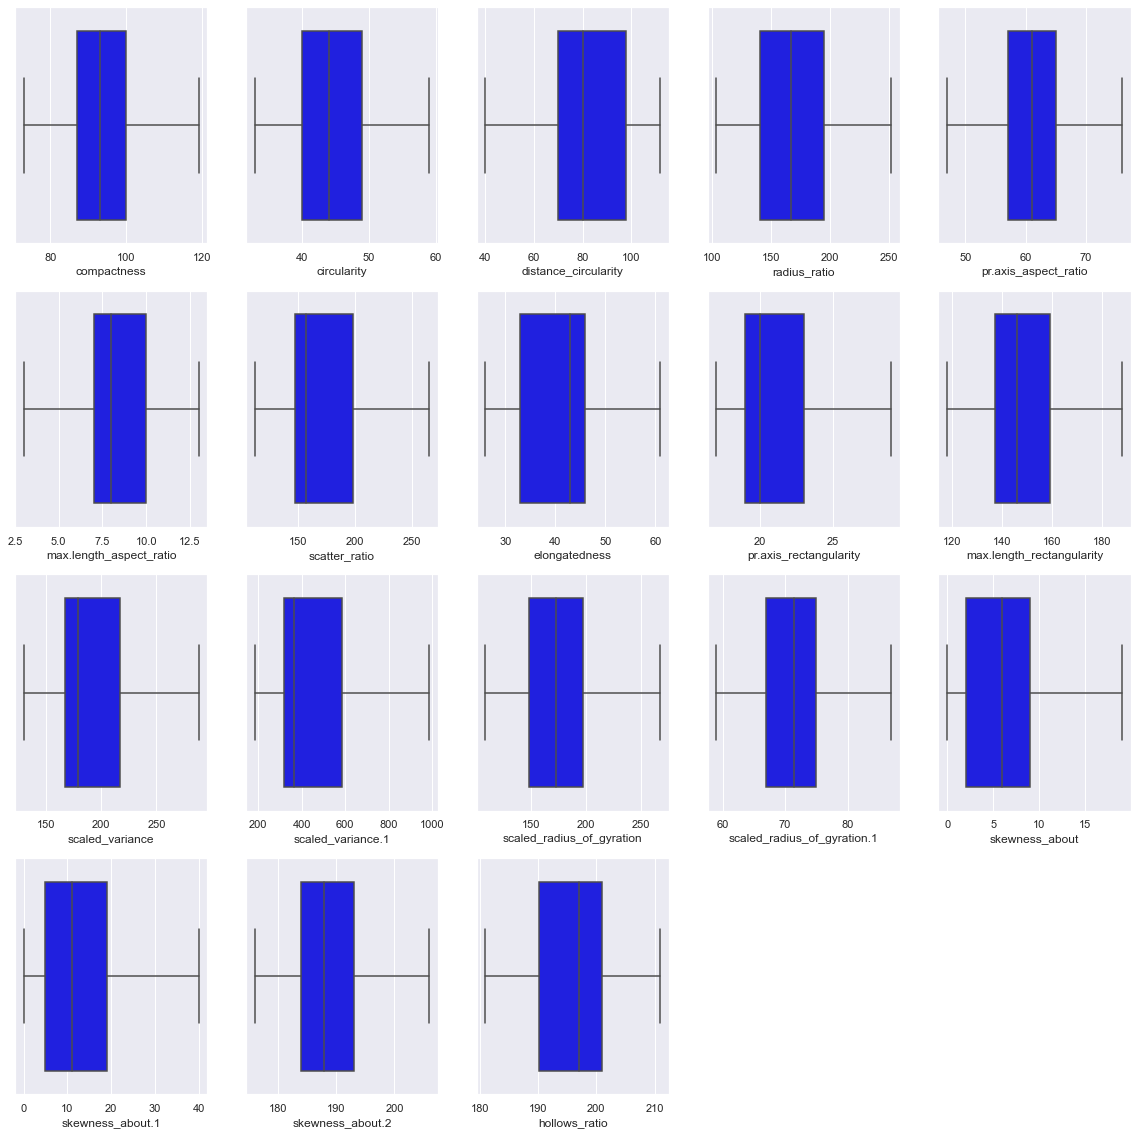

In [130]:
# Box plot to check for the outliers have been replaced by median value
plt.figure(figsize=(20,20))
col=1
for i in vdf.drop(columns='class').columns:
    plt.subplot(4,5,col)
    sns.boxplot(vdf[i],color='blue')
    col +=1

All the outlers have been taken care by imputing with median value

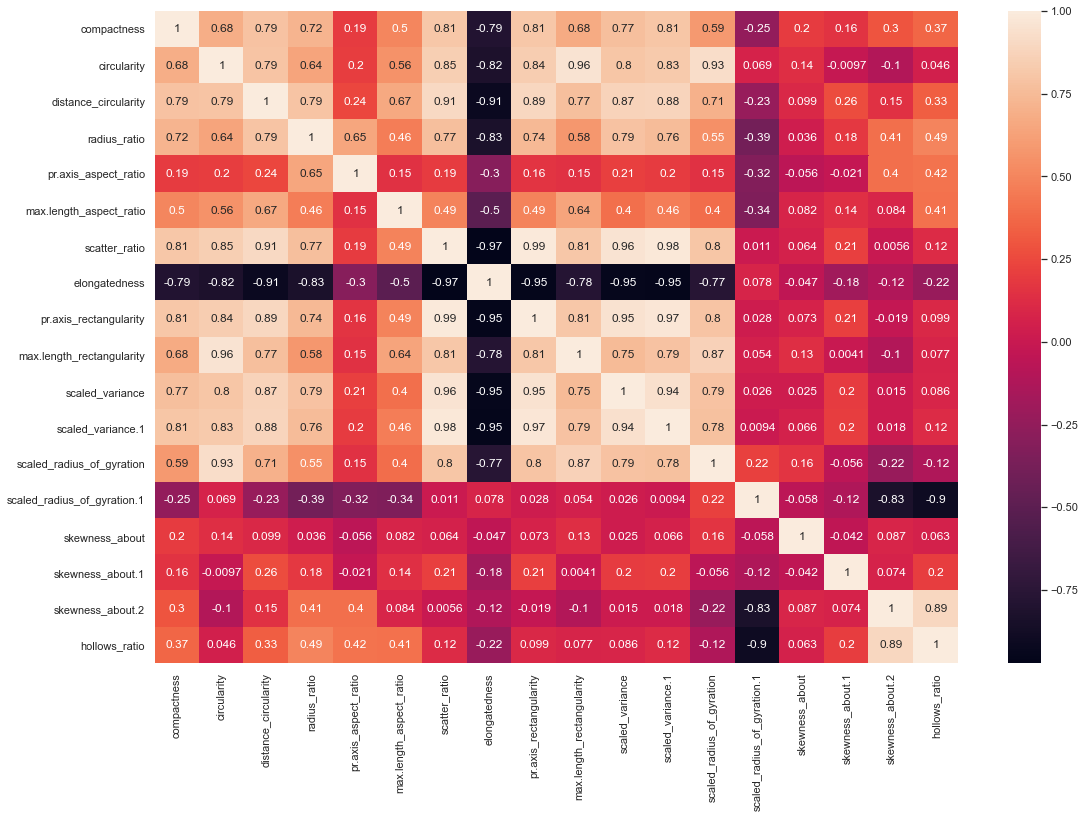

In [131]:
plt.figure(figsize=(18,12))
sns.heatmap(vdf.corr(),annot=True);

In [132]:
#spliiting the data to check for correlation with the class variable
X = vdf.loc[:, vdf.columns != 'class']
y = vdf['class'].astype('category').cat.codes

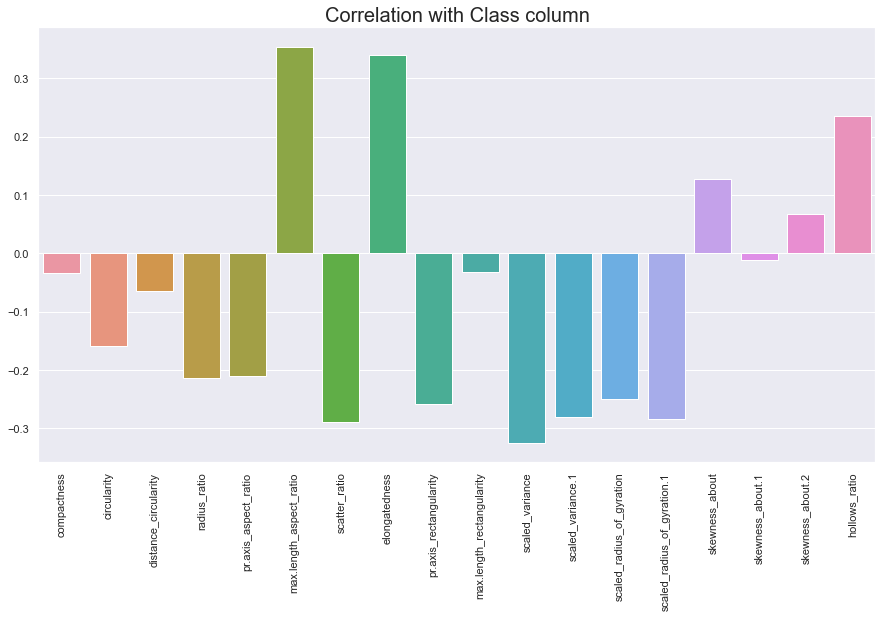

In [133]:
#plotting the correlation with target variable
plt.figure(figsize = (15, 8))
ax=sns.barplot(x=X.columns, y = X.corrwith(y))
sns.barplot(x = X.columns, y = X.corrwith(y))
plt.title('Correlation with Class column', fontsize = 20)
x=plt.setp(ax.get_xticklabels(), rotation=90)

# Classifier: Design and train a best fit SVM classier using all the data attributes.

In [134]:
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [135]:
#splitting the original data into train and test 70:30
X_scaled = X.apply(zscore)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 10)

In [136]:
print(f'''X_train shape:{X_train.shape}''')
print(f'''X_test shape:{X_test.shape}''')

X_train shape:(592, 18)
X_test shape:(254, 18)


In [137]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)

SVC(C=4)

In [138]:
# predicting on train data
sv_train_predict = svc_model .predict(X_train)
print(f'''Training accuracy: {metrics.accuracy_score(y_train, sv_train_predict)}''')
print()

Training accuracy: 0.9898648648648649



In [139]:
# predicting on test data
sv_test_predict = svc_model .predict(X_test)
print(f'''Testing accuracy: {metrics.accuracy_score(y_test, sv_test_predict)}''')
print()

Testing accuracy: 0.968503937007874



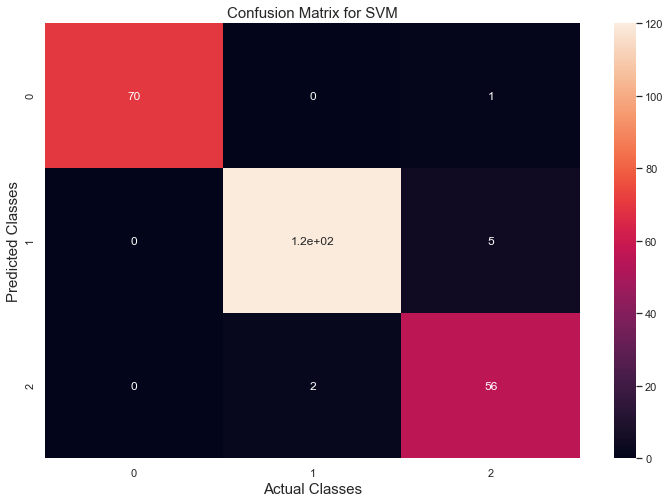

In [140]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, sv_test_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [141]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, sv_test_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      0.96      0.97       125
           2       0.90      0.97      0.93        58

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



In [142]:
precision_SV, recall_SV, f1_score_SV, support = precision_recall_fscore_support(y_test, sv_test_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV)
print('Recall Score :', '%0.2f' % recall_SV)
print('F1-Score:', '%0.2f' % f1_score_SV)
SV_Acc= accuracy_score(y_test, sv_test_predict)
print('Accuracy Score :','%0.2f' % SV_Acc)

Precision Score : 0.96
Recall Score : 0.97
F1-Score: 0.97
Accuracy Score : 0.97


# Dimensional reduction(PCA)

In [143]:
# scaling the independent variables
X_scaled = X.apply(zscore)
X_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.300945,1.933135,0.912212,-0.207598,0.136262,-0.224342,0.758332,-0.400771,-0.337407,0.285705,-0.315806,-0.032330,0.387162,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.850666,-0.740596,0.427456,-0.599423,0.520519,-0.610886,-0.344578,-0.594220,-0.618623,-0.513630,0.009122,0.624090,0.161740,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.265808,0.863642,0.912212,1.148719,-1.144597,0.935290,0.689401,1.114582,1.131806,1.392477,0.171586,1.718123,-0.401818,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.290423,0.328896,0.427456,-0.750125,0.648605,-0.610886,-0.344578,-0.916635,-0.739145,-1.466683,-1.453054,-0.032330,-0.289106,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.141310,-0.027601,-0.057300,-0.599423,0.520519,-0.610886,-0.275646,1.694930,-0.647319,0.408680,-0.072110,0.624090,-0.176395,-1.450481,-1.699181


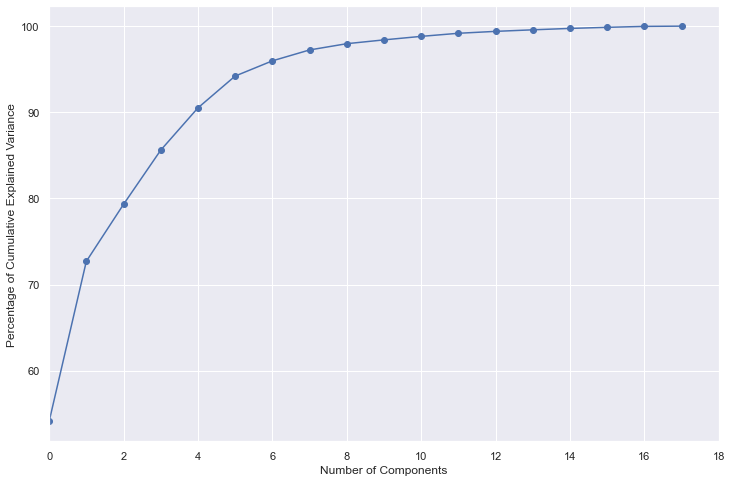

In [144]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize =(12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_)*100),marker='o');
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');

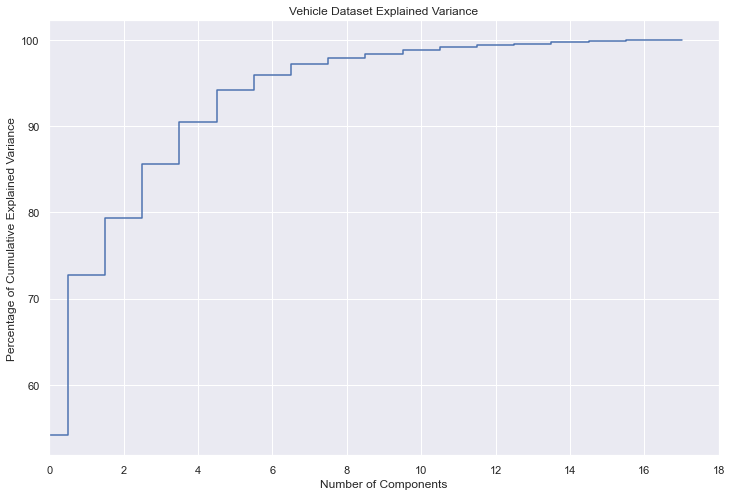

In [145]:
plt.figure(figsize = (12, 8))
plt.step(list(range(18)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance');

In [146]:
#Using 6 components and printing the eigen vectors
pca1 = PCA(n_components=6)
pca1.fit_transform(X_scaled)
print(pca1.components_)
print(pca1.explained_variance_ratio_)
Xpca1 = pca1.transform(X_scaled)

[[ 0.27250289  0.28725469  0.30242111  0.26971354  0.09786073  0.19520014
   0.31052393 -0.3090069   0.307287    0.27815416  0.29976509  0.30553237
   0.26323762 -0.04193594  0.03608321  0.05872048  0.03801314  0.08474   ]
 [-0.08704358  0.13162176 -0.04614301 -0.19793126 -0.25783995 -0.10804563
   0.07528535 -0.01322994  0.0875602   0.12215424  0.07726575  0.07150302
   0.21058205  0.50362158 -0.01576632 -0.09274624 -0.50162122 -0.50761211]
 [-0.03818521 -0.20114691  0.06346211  0.05628517 -0.06199275 -0.14895782
   0.10904283 -0.09085269  0.1060705  -0.21368469  0.1445998   0.11034374
  -0.20287019  0.07386402 -0.55917399  0.6706805  -0.06224071 -0.04170535]
 [ 0.13867501 -0.03805548  0.10895429 -0.25435509 -0.61276572  0.27867816
   0.00539295  0.06521486  0.03089915  0.04146747 -0.06400509 -0.00219687
  -0.08553965 -0.11539962  0.47370331  0.42842603 -0.0274096   0.09603749]
 [ 0.13710147 -0.13899555 -0.08001743  0.13374437  0.12360146 -0.63489336
   0.08555745 -0.07907344  0.08164

In [147]:
#printing the original features and the reduced features
pca_6 = PCA(n_components = 6)
X_pca = pca_6.fit_transform(X_scaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 18
Reduced number of features: 6


In [148]:
#viewing the first 5 observations of the pca components
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

,0,1,2,3,4,5
0,0.584228,-0.675673,-0.453334,-0.750656,-0.777515,-1.848809
1,-1.512180,-0.348934,-0.333436,1.268953,-0.324929,-0.118317
2,3.913448,0.234507,-1.265094,0.137224,0.915751,-0.685594
3,-1.535193,-3.044413,-0.469623,0.324317,-0.611590,0.367777
4,-0.642062,1.488882,-0.246288,-0.550939,0.471655,-1.012697


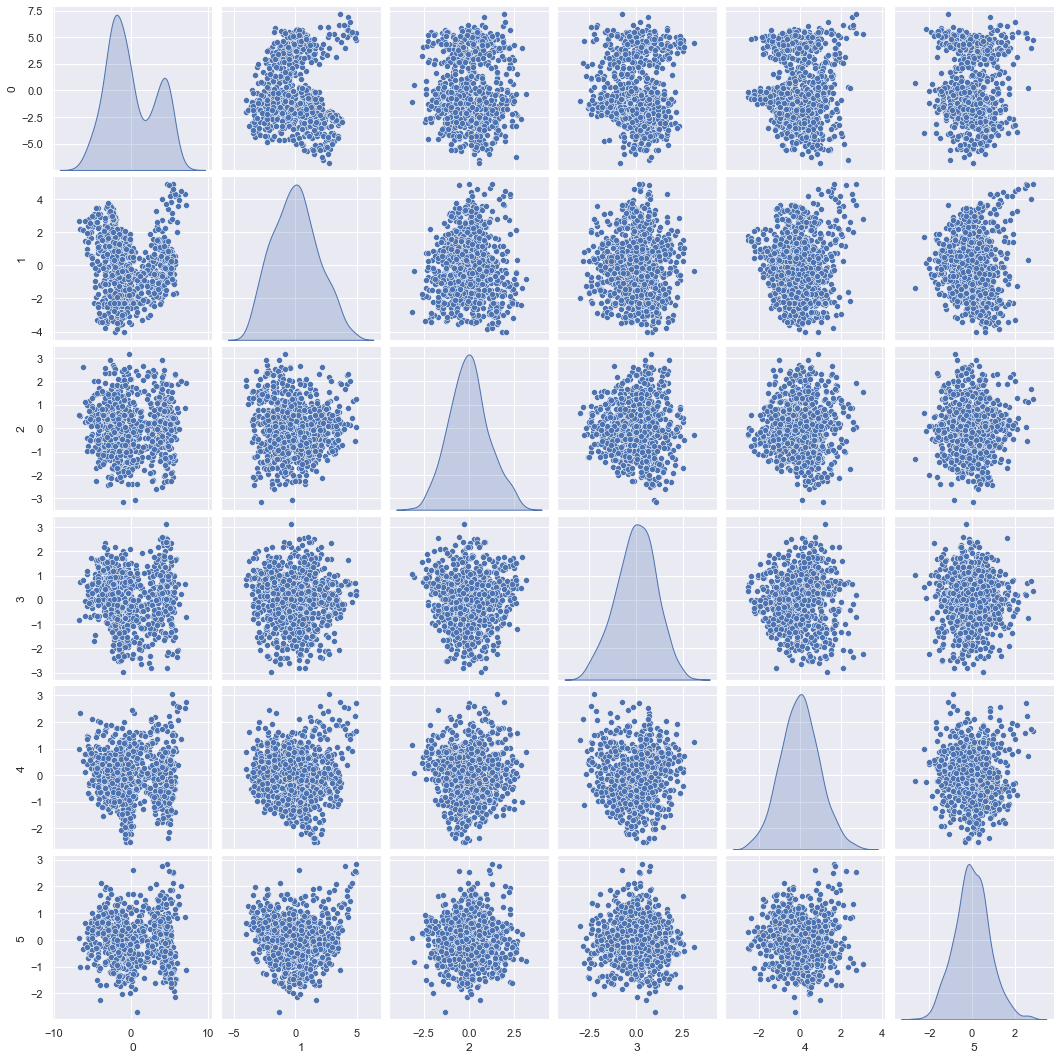

In [149]:
sns.pairplot(pca_df, diag_kind = 'kde');

# Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes.

In [150]:
#splitting the pca data into train and test 70:30
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

In [151]:
print(f'''X_tr shape:{X_tr.shape}''')
print(f'''X_te shape:{X_te.shape}''')

X_tr shape:(592, 6)
X_te shape:(254, 6)


In [152]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_tr, y_tr)

SVC(C=4)

In [153]:
# predicting on train data
sv_tr_predict = svc_model .predict(X_tr)
print(f'''Training accuracy: {metrics.accuracy_score(y_tr, sv_tr_predict)}''')
print()

Training accuracy: 0.9476351351351351



In [154]:
# predicting on test data
sv_te_predict = svc_model .predict(X_te)
print(f'''Testing accuracy: {metrics.accuracy_score(y_te, sv_te_predict)}''')
print()

Testing accuracy: 0.9212598425196851



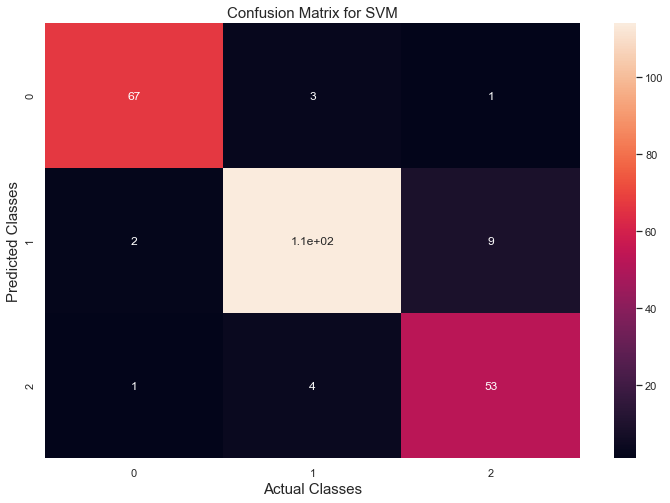

In [155]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_te, sv_te_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [156]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_te, sv_te_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.94      0.91      0.93       125
           2       0.84      0.91      0.88        58

    accuracy                           0.92       254
   macro avg       0.91      0.92      0.92       254
weighted avg       0.92      0.92      0.92       254



In [157]:
precision_SV_pca, recall_SV_pca, f1_score_SV_pca, support_pca = precision_recall_fscore_support(y_te, sv_te_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV_pca)
print('Recall Score :', '%0.2f' % recall_SV_pca)
print('F1-Score:', '%0.2f' % f1_score_SV_pca)
SV_Acc_pca= accuracy_score(y_te, sv_te_predict)
print('Accuracy Score :','%0.2f' % SV_Acc_pca)

Precision Score : 0.91
Recall Score : 0.92
F1-Score: 0.92
Accuracy Score : 0.92


In [158]:
modellists = []
modellists.append(['Support Vector Classifier without PCA', SV_Acc * 100, recall_SV * 100, precision_SV * 100,f1_score_SV*100])
modellists.append(['Support Vector Classifier with PCA', SV_Acc_pca* 100, recall_SV_pca * 100, precision_SV_pca * 100,f1_score_SV_pca*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','Accuracy Score of Test Data', 'Recall Score', 'Precision Score','F1 Score'])
mdl_df

,Model,Accuracy Score of Test Data,Recall Score,Precision Score,F1 Score
0,Support Vector Classifier without PCA,96.850394,97.047758,96.227745,96.596702
1,Support Vector Classifier with PCA,92.125984,92.315169,91.352049,91.773898


Bothe the model give more than 90% accuracy on the test data, PCA used only 6 attributes to come up with an accuracy of 90%+ where as the model without pca used all the variables to come up with 90%+ accuracy, the difference can be illustrated even better if the dataset had been cursed with dimensionality, since its 18 variable in the original data the difference is very subtle.

# PART-IV (DOMAIN: Sports Management)- Goal is to build a data driven batsman ranking model for the sports management company to make business decisions

In [159]:
# importing libraries
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [160]:
# importing dataset
ipl = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
ipl.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA and visualisation

In [161]:
#size of the dataset
ipl.shape
print(f'''The datset has {ipl.shape[0]} rows and {ipl.shape[1]} columns''')

The datset has 180 rows and 7 columns


In [162]:
# checking info and datatypes of the attributes
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


In [163]:
# checking for null values
ipl.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

It is found that 50% of the dataset has null values. Since, it is individual performance in each attributes null values can't be replaced by central values. hence, droping the null values.

In [164]:
# droping null values
ipl.dropna(axis=0,inplace=True)

In [165]:
# final shape of the dataset after droping the column
ipl.shape
print(f'''The datset has {ipl.shape[0]} rows and {ipl.shape[1]} columns''')

The datset has 90 rows and 7 columns


In [166]:
ipl.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [167]:
ipl.describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


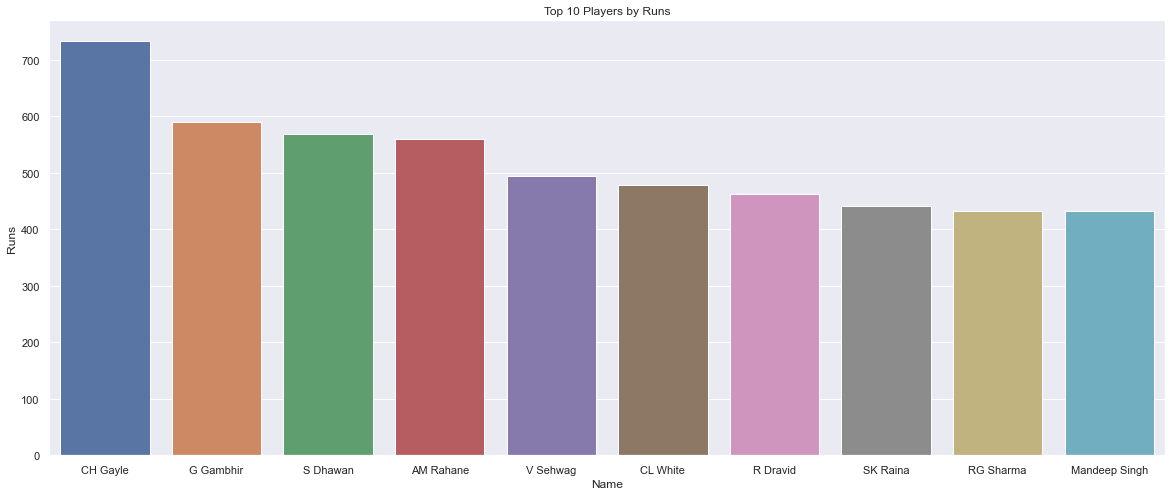

In [168]:
plt.figure(figsize=(20,8))
ipl_runs = ipl.groupby('Name')['Runs'].sum().sort_values(ascending=False).head(10)
ipl_runs= ipl_runs.reset_index() 
ipl_runs.columns = ['Name' ,'Runs']
sns.barplot(data= ipl_runs , x= 'Name' , y ='Runs');
plt.title("Top 10 Players by Runs");

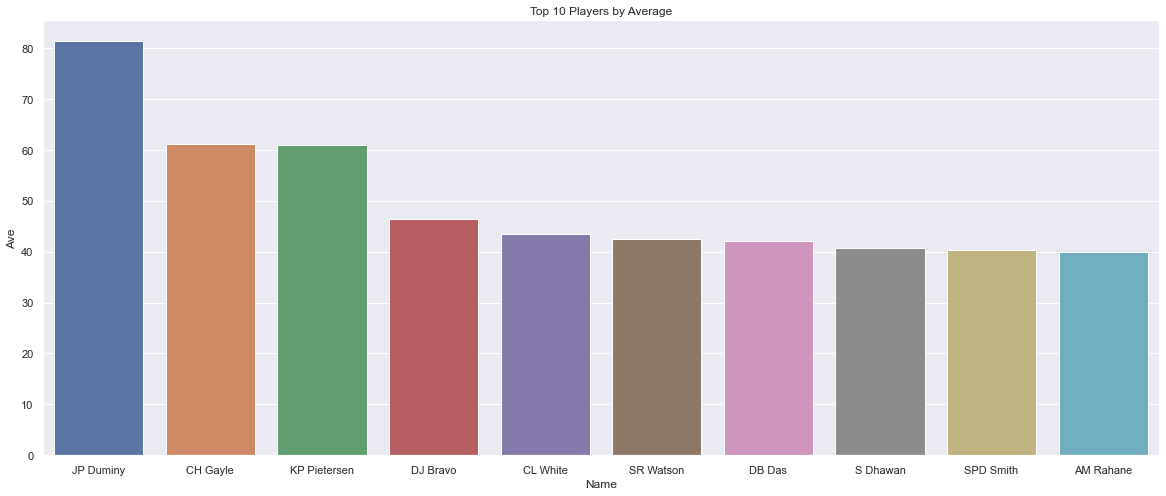

In [169]:
plt.figure(figsize=(20,8))
ipl_avg = ipl.groupby('Name')['Ave'].sum().sort_values(ascending=False).head(10)
ipl_avg= ipl_avg.reset_index() 
ipl_avg.columns = ['Name' ,'Ave']
sns.barplot(data= ipl_avg , x= 'Name' , y ='Ave');
plt.title("Top 10 Players by Average");

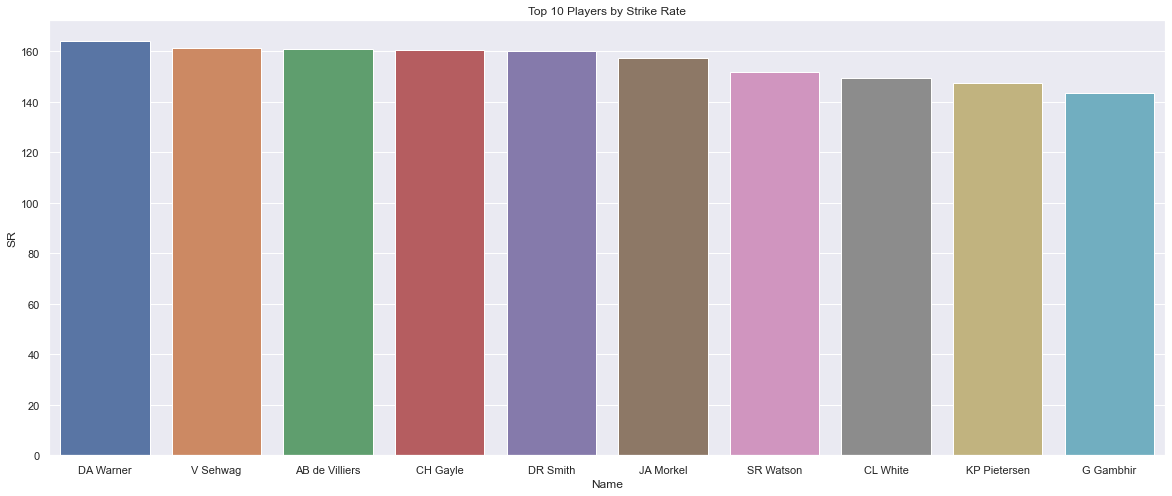

In [170]:
plt.figure(figsize=(20,8))
ipl_SR= ipl.groupby('Name')['SR'].sum().sort_values(ascending=False).head(10)
ipl_SR= ipl_SR.reset_index() 
ipl_SR.columns = ['Name','SR']
sns.barplot(data= ipl_SR , x= 'Name' , y ='SR');
plt.title("Top 10 Players by Strike Rate");

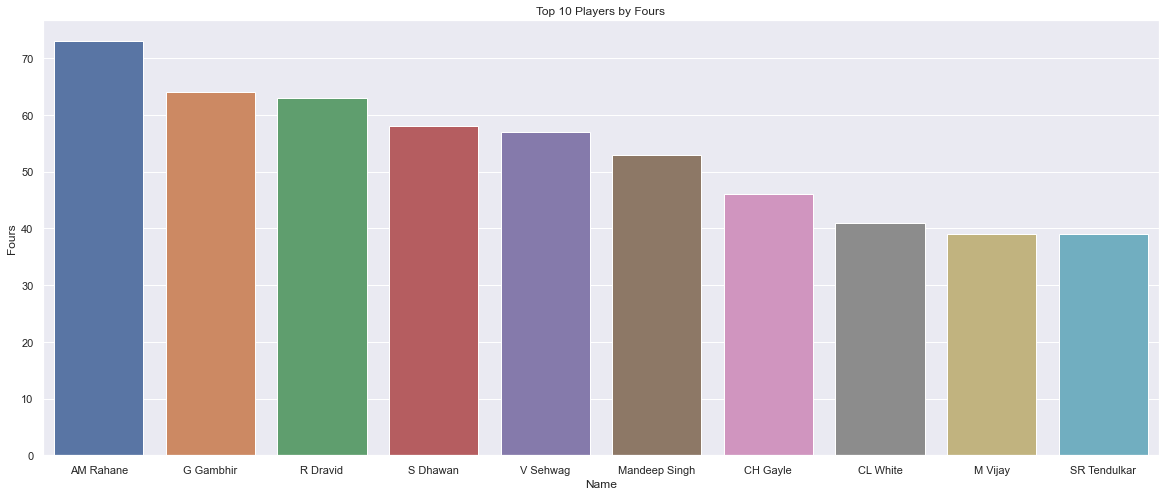

In [171]:
plt.figure(figsize=(20,8))
ipl_Fours= ipl.groupby('Name')['Fours'].sum().sort_values(ascending=False).head(10)
ipl_Fours= ipl_Fours.reset_index() 
ipl_Fours.columns = ['Name','Fours']
sns.barplot(data= ipl_Fours , x= 'Name' , y ='Fours');
plt.title("Top 10 Players by Fours");

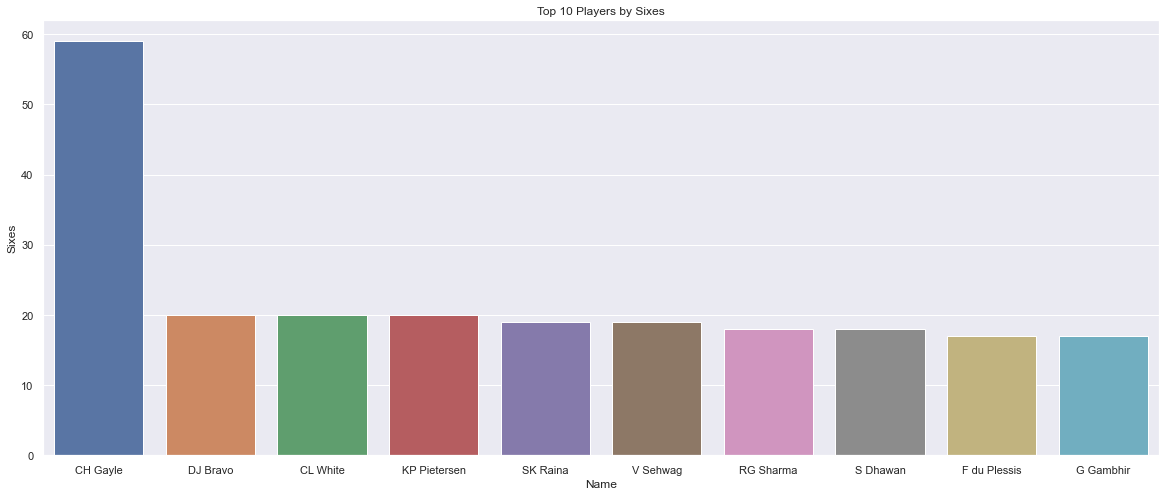

In [172]:
plt.figure(figsize=(20,8))
ipl_Sixes= ipl.groupby('Name')['Sixes'].sum().sort_values(ascending=False).head(10)
ipl_Sixes= ipl_Sixes.reset_index() 
ipl_Sixes.columns = ['Name','Sixes']
sns.barplot(data= ipl_Sixes , x= 'Name' , y ='Sixes');
plt.title("Top 10 Players by Sixes");

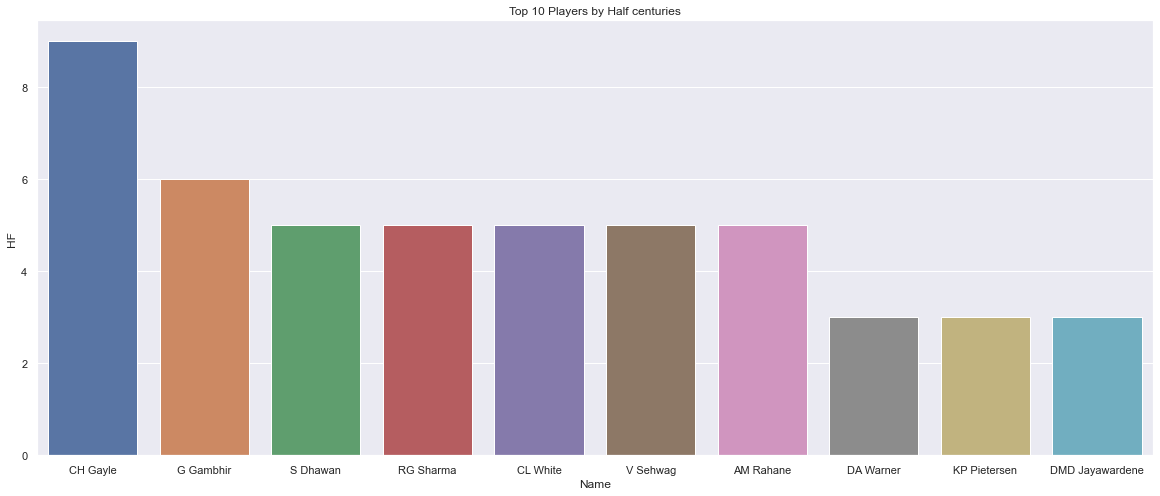

In [173]:
plt.figure(figsize=(20,8))
ipl_HF= ipl.groupby('Name')['HF'].sum().sort_values(ascending=False).head(10)
ipl_HF= ipl_HF.reset_index() 
ipl_HF.columns = ['Name','HF']
sns.barplot(data= ipl_HF , x= 'Name' , y ='HF');
plt.title("Top 10 Players by Half centuries");

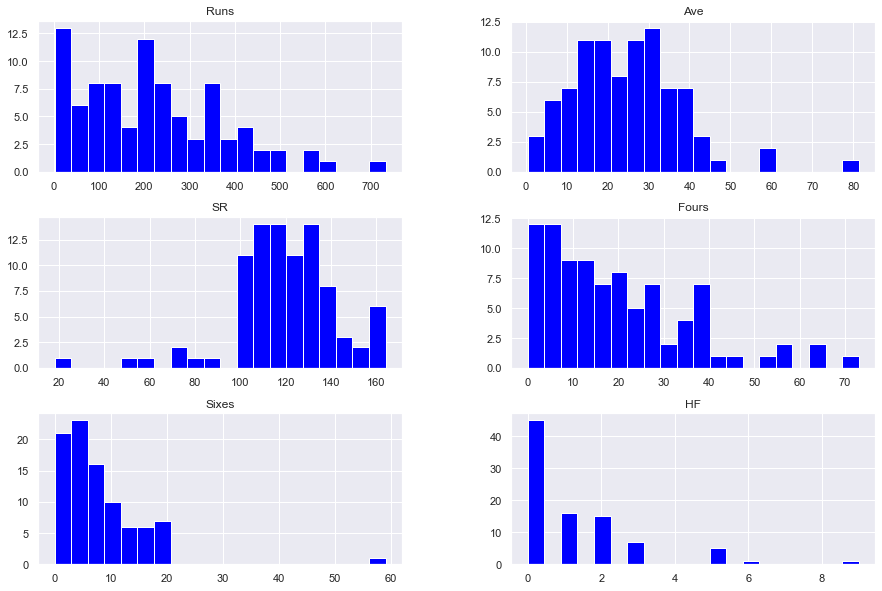

In [174]:
ipl.hist(bins = 20, figsize = (15, 10), color = 'blue');

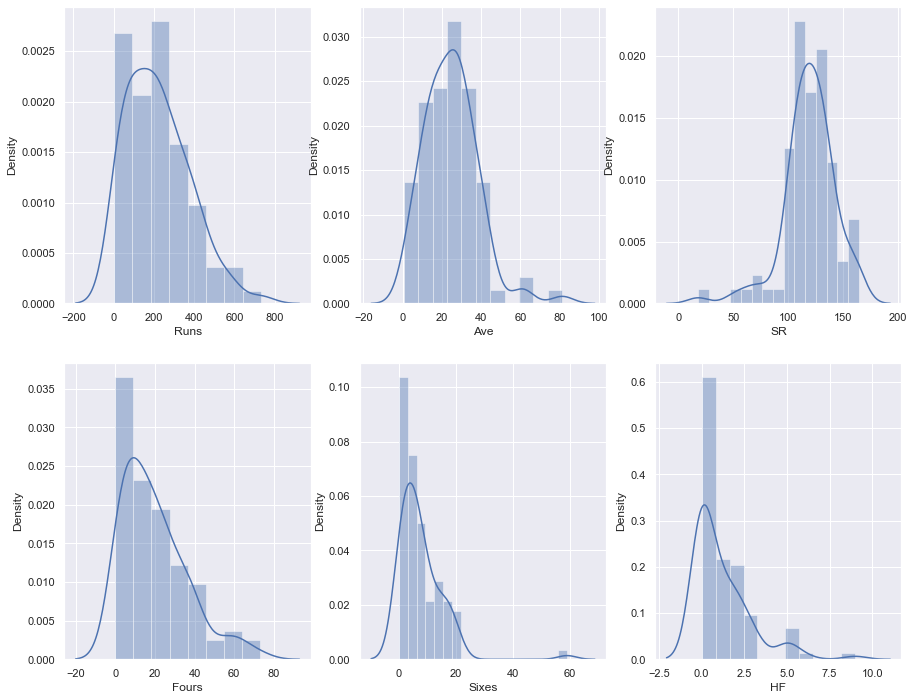

In [175]:
plt.figure(figsize=(15, 12))
col = 1
for i in ipl.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.distplot(ipl[i], color = 'b')
    col += 1 

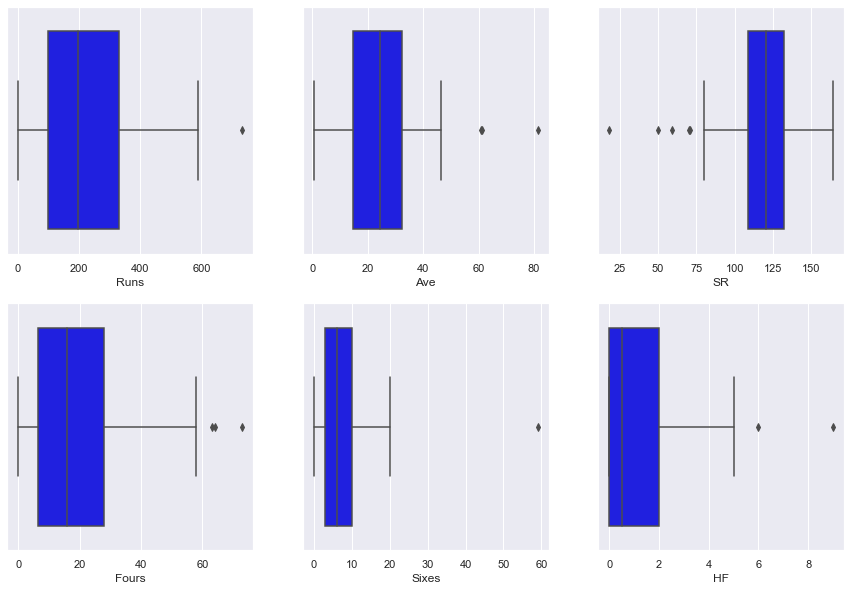

In [176]:
plt.figure(figsize=(15, 10))
col = 1
for i in ipl.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.boxplot(ipl[i],color='blue')
    col += 1

Seems there are quite a few outliers are present. 

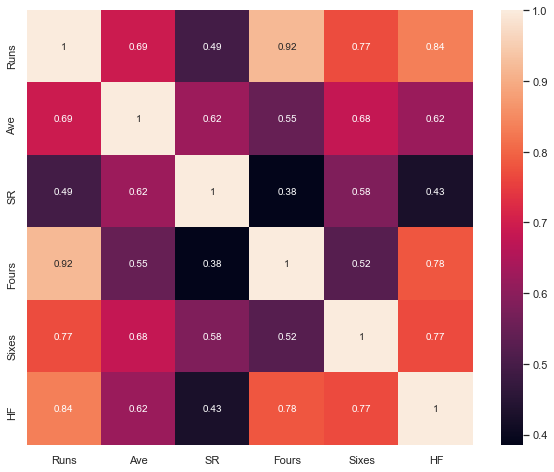

In [177]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=ipl.drop(columns='Name').corr()
sns.heatmap(corr,annot=True);

All the variable except fours with strike rate, strike rate with half centuries,strike rate with runs, have high correlation.

# Build a data driven model to rank all the players in the dataset using all or the most important performance features.

In [178]:
ipl.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [179]:
# feature scaling  the numerical data
ipl_scaled = ipl.iloc[:,1:]
ipl_scaled = ipl_scaled.apply(zscore)
ipl_scaled.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


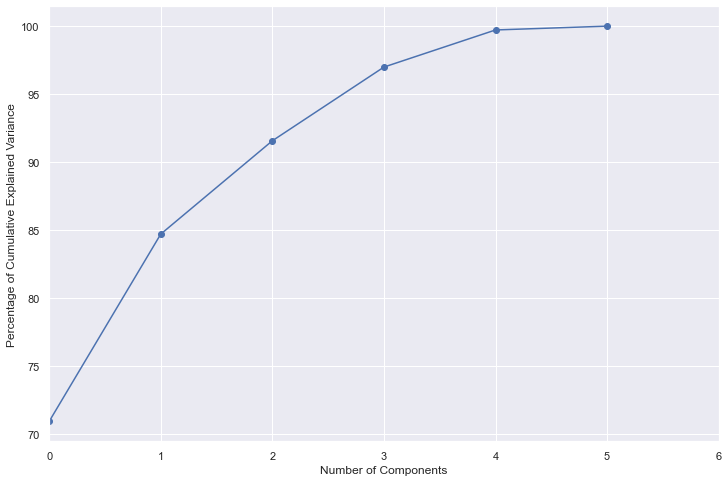

In [180]:
# will use PCA to reduce the number of futures.
pca = PCA()
ipl_pca = pca.fit_transform(ipl_scaled)
plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_)*100),marker='o');
plt.xlim(0, 6)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');

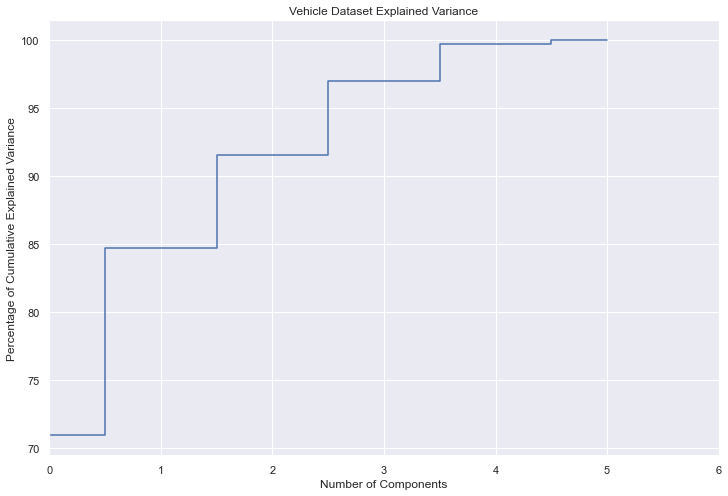

In [181]:
plt.figure(figsize = (12, 8))
plt.step(list(range(6)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0,6)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance');

# Create a covariance matrix for identifying Principal components

In [182]:
# Create a covariance matrix for identifying Principal components
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(ipl_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [183]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.4582608  -0.26643209 -0.70483594 -0.45840889  0.10977942  0.00520142]
 [-0.39797313  0.33111756  0.0606373   0.10122837 -0.00550486 -0.84736307]
 [-0.3253838   0.69780334 -0.05624934  0.11890348  0.45013448  0.43275029]
 [-0.40574167 -0.47355804  0.58514214 -0.09676885  0.50823538  0.03252305]
 [-0.41733459  0.17902455  0.35786211 -0.39458014 -0.66942589  0.24878157]
 [-0.43237178 -0.27593225 -0.16096217  0.77486668 -0.28082541  0.17811777]]

 Eigen Values 
%s [4.30252561 0.83636692 0.01706297 0.16567829 0.41665751 0.32912443]


In [184]:
#  Find variance and cumulative variance by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'''eigen values for  all pc's {eig_vals}''')
print('\n')
print(f'''sum of eigen values {tot}''')
print('\n')
print("Cumulative Variance Explained", cum_var_exp)

eigen values for  all pc's [4.30252561 0.83636692 0.01706297 0.16567829 0.41665751 0.32912443]


sum of eigen values 6.067415730337082


Cumulative Variance Explained [ 70.91199612  84.696562    91.56369501  96.98815324  99.71877694
 100.        ]


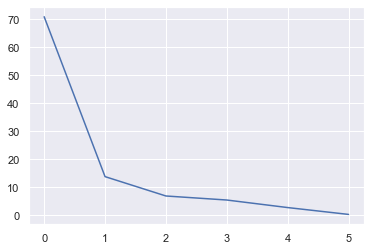

In [185]:
plt.plot(var_exp)

In [186]:
#  Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
# We will proceed with 5 components here. But depending on requirement 90% variation or 2 components will also do good

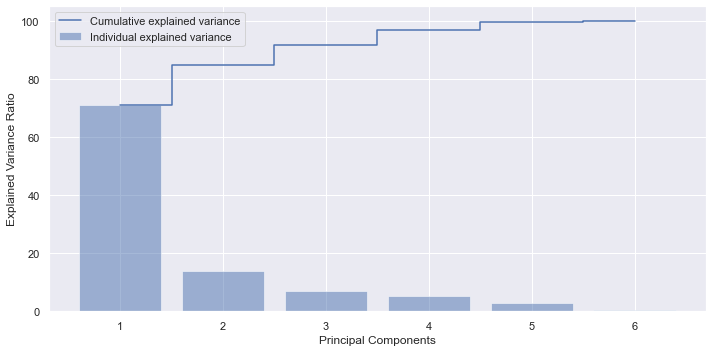

In [187]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [188]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(ipl_scaled)
pca.components_

array([[ 0.4582608 ,  0.39797313,  0.3253838 ,  0.40574167,  0.41733459,
         0.43237178],
       [ 0.26643209, -0.33111756, -0.69780334,  0.47355804, -0.17902455,
         0.27593225]])

In [189]:
#corelation between components and futures
df_comp = pd.DataFrame(pca.components_,columns=list(ipl_scaled))
df_comp.head().T

,0,1
Runs,0.458261,0.266432
Ave,0.397973,-0.331118
SR,0.325384,-0.697803
Fours,0.405742,0.473558
Sixes,0.417335,-0.179025
HF,0.432372,0.275932


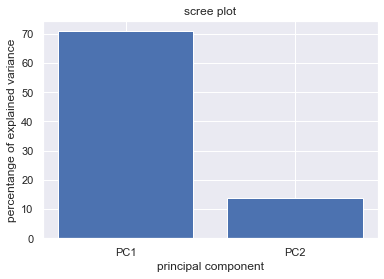

In [190]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

 scree plot to visualize the percentage of variance explained by each principal component.

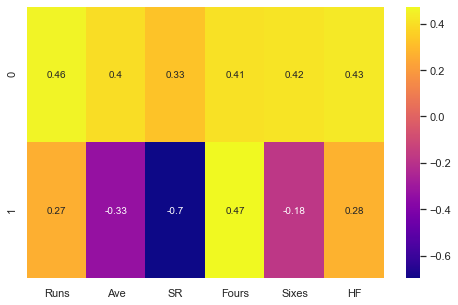

In [191]:
plt.figure(figsize=(8,5))
sns.heatmap(df_comp,cmap='plasma',annot=True);

In [192]:
# This heatmap and the color bar basically represent the correlation between the various feature 
# and the principal component itself

# PART-V Question based

# 1. List down all possible dimensionality reduction techniques that can be implemented using python

# 2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.

In [193]:
# importing libraries
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Import images into python using PIL or any other python image library

In [194]:
# the dataset used is Sign Language Digits Dataset
X = np.load('X.npy')
Y = np.load('Y.npy')

# Display the image - actual

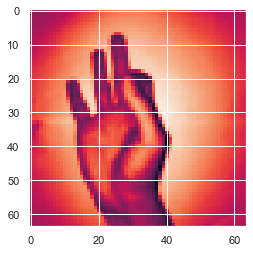

In [195]:
plt.imshow(X[0]);

# Display the image - matrix 

In [196]:
X.shape

(2062, 64, 64)

there are 2062 images, each 64x64 dimension vextors.



the Y dataset here gives us the labels for these images, it's kind of weirdly ordered and this image represents the number


In [197]:
# the Y dataset here gives us the labels for these images, it's kind of weirdly ordered and this image represents the number
9 - np.argmax(Y[0])

9

# SL algorithms require a MxN dataframe to classify. Whereas here a single image is MxN, hence making it difficult for SL algorithm to intake data. 

In [198]:
# to start with let's flatten our data into 2062 4096 dim vectors and split the dataset into training and testing sets
X_flat = np.array(X).reshape((2062, 64*64))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)   

# Apply any other algorithm of your choice. Note the accuracy (A1)

# KNN

In [199]:
# To demonstrate how dimensionality reduction can improve the results of a model we need a model. 
# Here is a very basic, fully connected neural net
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [200]:
y_hat = neigh.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.42326332794830374


# MLP

In [201]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20), random_state=1)

In [202]:
y_hat = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.3360258481421648


In [203]:
# implementing PCA
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1 

In [204]:
d

292

we have reduced 4096 dimensions to just 292! But how good is this actually? Let's train PCA on our training set and transform the data, then print out an example

In [205]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (1443, 292)
recovered shape: (1443, 4096)


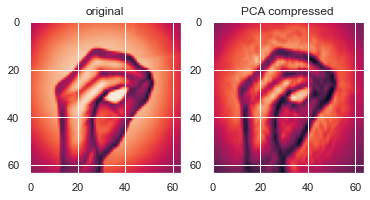

In [206]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

# KNN

In [207]:
neigh_reduced = KNeighborsClassifier(n_neighbors=10)
neigh_reduced.fit(X_reduced, y_train)

KNeighborsClassifier(n_neighbors=10)

In [208]:
X_test_reduced = pca.transform(X_test)

y_hat_reduced = neigh_reduced.predict(X_test_reduced)

print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

accuracy: 0.43134087237479807


Model accuracy is boosted from 42.32% accuracy on the test set to 43.13% for KNN algorithm.

# MLP

In [209]:
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
clf_reduced.fit(X_reduced, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20))

In [210]:
X_test_reduced = pca.transform(X_test)

y_hat_reduced = clf_reduced.predict(X_test_reduced)

print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

accuracy: 0.6478190630048465


Model accuracy is boosted from ~30% accuracy on the test set to ~65% for MLP algorithm after dimensionality reduction using PCA. 